$$
    \newcommand{\genericdel}[3]{%
      \left#1#3\right#2
    }
    \newcommand{\del}[1]{\genericdel(){#1}}
    \newcommand{\sbr}[1]{\genericdel[]{#1}}
    \newcommand{\cbr}[1]{\genericdel\{\}{#1}}
    \newcommand{\abs}[1]{\genericdel||{#1}}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \DeclareMathOperator{\Pr}{\mathbb{p}}
    \DeclareMathOperator{\E}{\mathbb{E}}
    \DeclareMathOperator{\Ind}{\mathbb{I}}
    \DeclareMathOperator{\V}{\mathbb{V}}
    \DeclareMathOperator{\cov}{Cov}
    \DeclareMathOperator{\var}{Var}
    \DeclareMathOperator{\ones}{\mathbf{1}}
    \DeclareMathOperator{\invchi}{\mathrm{Inv-\chi}^2}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \newcommand{\effect}{\mathrm{eff}}
    \newcommand{\xtilde}{\widetilde{X}}
    \DeclareMathOperator{\normal}{\mathcal{N}}
    \DeclareMathOperator{\unif}{Uniform}
    \newcommand{\boxleft}{\unicode{x25E7}}
    \newcommand{\boxright}{\unicode{x25E8}}
    \newcommand{\discont}{\unicode{x25EB}}
    \newcommand{\jleft}{\unicode{x21E5}}
    \newcommand{\jright}{\unicode{x21E4}}
    \DeclareMathOperator*{\gp}{\mathcal{GP}}
    \newcommand{\trans}{^{\intercal}}
    \newcommand{\scrS}{\mathscr{S}}
    \newcommand{\sigmaf}{\sigma_{\mathrm{GP}}}
    \newcommand{\sigman}{\sigma_{\epsilon}}
    \newcommand{\sigmatau}{\sigma_{\tau}}
    \newcommand{\sigmabeta}{\sigma_{\beta}}
    \newcommand{\sigmamu}{\sigma_{\mu}}
    \newcommand{\sigmagamma}{\sigma_{\gamma}}
    \newcommand{\svec}{\mathbf{s}}
    \newcommand{\indep}{\perp}
    \newcommand{\iid}{iid}
    \newcommand{\vectreat}{\Ind_{T}}
    \newcommand{\yt}{Y^\mathrm{T}}
    \newcommand{\yc}{Y^\mathrm{C}}
    \newcommand{\boundary}{\partial}
    \newcommand{\sentinels}{\mathbf{\boundary}}
    \newcommand{\eye}{\mathbf{I}}
    \newcommand{\K}{\mathbf{K}}
    \DeclareMathOperator{\trace}{trace}
    \newcommand{\linavg}{\bar{\tau}}
    \newcommand{\invvar}{\tau^{IV}}
    \newcommand{\modnull}{\mathscr{M}_0}
    \newcommand{\modalt}{\mathscr{M}_1}
    \newcommand{\degree}{\hspace{0pt}^\circ}
    \newcommand{\saleprice}{\mathtt{SalePrice}}
    \newcommand{\sqft}{\mathtt{SQFT}}
    \newcommand{\xvec}{\mathbf{x}}
    \newcommand{\tax}{\mathtt{TaxClass}}
    \newcommand{\building}{\mathtt{BuildingClass}}
    \newcommand{\trans}{^{\intercal}}
$$

In [12]:
using LaTeXStrings
using GaussianProcesses
using GaussianProcesses: grad_slice!, cov!, addcov!, KernelData
import GaussianProcesses: get_params, set_params!, num_params
import GaussianProcesses: distance, optimize!
import GaussianProcesses: Mean, Kernel, grad_stack!, grad_stack
import PDMats: AbstractPDMat, PDMat
import Base: mean
using Distributions
using Base.LinAlg
using Distances
using GeoJSON
using Optim
using GLM
import MultivariateStats
mvst=MultivariateStats

import PyPlot; plt=PyPlot
plt.rc("figure", dpi=300.0)
# plt.rc("figure", figsize=(6,4))
# plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
cbbPalette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
;

In [13]:
using PyCall
PyCall.unshift!(PyVector(pyimport("sys")["path"]), "")
@PyCall.pyimport NYC_prepare_plots
;

In [14]:
include("../src/GeoRDD.jl")


Use "MultiGPCovars{MT,KT1,KT2}(...) where {MT,KT1,KT2}" instead.


GeoRDD

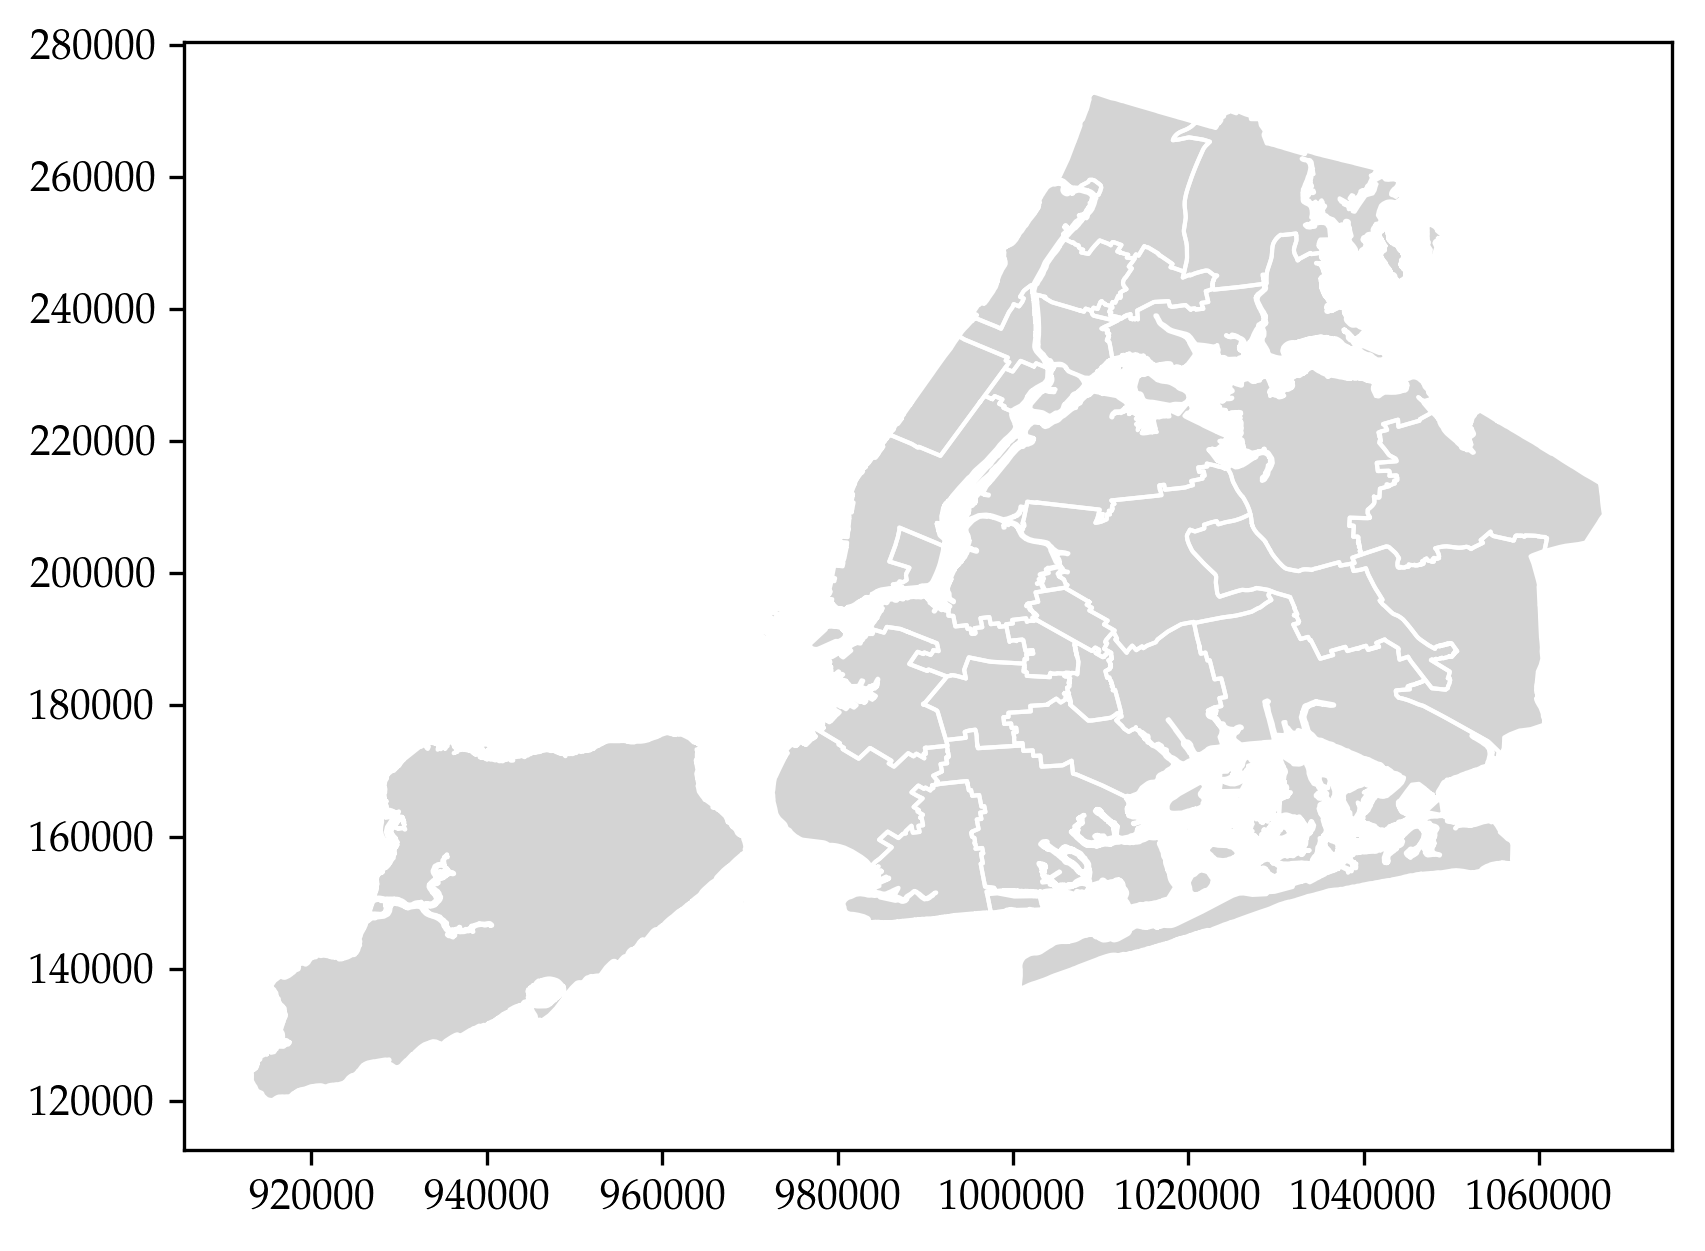

In [15]:
NYC_prepare_plots.background_schdistrs(plt.gca(),
            color="#AAAAAA", 
            edgecolor="white", 
            linestyle="-")
;

# Dataset and Preprocessing

In [16]:
include("NYC.jl")

  likely near /Users/imolk/Documents/Harvard/Miratrix/rdd-coverage/Maxime/NYC/NYC.jl:4
  likely near /Users/imolk/Documents/Harvard/Miratrix/rdd-coverage/Maxime/NYC/NYC.jl:4


sales_dicts (generic function with 1 method)

In [17]:
NYC_sales = read_processed_sales()

filtered = filter_sales(NYC_sales)

sentinels = read_sentinels()

model_dicts = sales_dicts(filtered[:filtered])
schdistr_indices = model_dicts[:schdistr_indices]
schdistrs = model_dicts[:schdistrs]
X_dict = model_dicts[:X_dict]
Y_dict = model_dicts[:Y_dict]
;

District 01 has 5 sales
District 02 has 85 sales
District 03 has 34 sales
District 04 has 6 sales
District 05 has 39 sales
District 06 has 30 sales
District 07 has 69 sales
District 08 has 739 sales
District 09 has 163 sales
District 10 has 312 sales
District 11 has 1172 sales
District 12 has 204 sales
District 13 has 322 sales
District 14 has 195 sales
District 15 has 517 sales
District 16 has 421 sales
District 17 has 459 sales
District 18 has 559 sales
District 19 has 686 sales
District 20 has 1010 sales
District 21 has 770 sales
District 22 has 1453 sales
District 23 has 245 sales
District 24 has 1283 sales
District 25 has 1317 sales
District 26 has 1268 sales
District 27 has 2199 sales
District 28 has 1033 sales
District 29 has 1956 sales
District 30 has 695 sales
District 31 has 0 sales
District 32 has 345 sales


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] anynull(::NullableArrays.NullableArray{Float64,1}) at ./deprecated.jl:57
 [3] convert(::Type{Array{Float64,2}}, ::DataTables.DataTable) at /Users/imolk/Library/Julia/packages/v0.6/DataTables/src/abstractdatatable/abstractdatatable.jl:545
 [4] setindex!(::Dict{String,Array{Float64,2}}, ::DataTables.DataTable, ::String) at ./dict.jl:420
 [5] sales_dicts(::DataTables.DataTable) at /Users/imolk/Documents/Harvard/Miratrix/rdd-coverage/Maxime/NYC/NYC.jl:192
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /Users/imolk/Library/Julia/packages/v0.6/Compat/src/Compat.jl:407
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/imolk/Library/Julia/packages/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /Users/imolk/Library/Julia/packages/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[17], i

New York publishes a year's worth of house sales on a rolling basis. Annoyingly, this means that data that is older than a year disappears, and I've not been able to find this data online. But New York is a density, so even just a year's data is quite a large dataset.

I also have some covariates, though somewhat less rich than I found in Tucson. What I have is square footage, tax class and [building class](http://nycprop.nyc.gov/nycproperty/help/hlpbldgcode.html). I've geocoded the address of each sale to get a latitude and longitude, and projected the coordinates onto a Euclidean plane in order to be able to calculate distances.

![sales map](NYC_plots/NYC_sales.png)

## Data cleaning

I remove the following sales:

* any sale with missing data in the sale price, square footage, property covariates, geographical coordinates (due to failed geocoding)
* sales outside of any NYC school district
* properties smaller than 100 sq ft
* outliers in the price per sqft, which I defined as sales outside of $3 < Y_i < 8$

I remove tiny properties because I feel like they might behave differently than the rest of the market.
Removing outliers is possibly contentious, but it makes sense to me that some sales between friends or family members could have a very low $Y_i$ that isn't a true representation of the market price, and that some high prices could be equally disconnected from the market.

This leaves {{sum(filtered[:believable])}} out of {{length(filtered[:believable])}} sales records in NYC, mostly because of properties that don't have a reported gross square footage.

# Model

I decided to define the outcome to be the log price per square foot. The model is a Gaussian Process in the spatial covariates on top of a ridge regression on the property covariates (building and tax class). Within a school district we could write the model as [suggestions for clearer notation welcome]:

\begin{align}
    Y_i &= \log\del{ \frac{\saleprice_i}{\sqft_i}} = \beta_0 + \beta_{1\tax\sbr{i}} + \beta_{2\building\sbr{i}} + f(\xvec_i) + \epsilon_i \\
    \epsilon_i &\sim \normal\del{0, \sigma_y^2} \\
    \beta_{1j},\beta_{2j} &\sim \normal\del{0, \sigma_\beta^2} \\
    f(\xvec_i) &\sim \gp\del{0, k(\xvec, \xvec')} \\
    k(\xvec, \xvec') &= \sigma_f^2 \exp\cbr{ - (\xvec-\xvec')\trans(\xvec-\xvec') / 2\ell^2}
\end{align}

A visual inspection of the house sales map above led me to focus on the boundary between districts 19 and 27. I found a map online of average maths performance in each school district, which shows that districts 19 and 27 are quite different. It's important to note that the boundary between the two districts is also part of the boundary between Brooklyn and Queens, so we won't be able to attribute a causal effect solely to the difference in school districts. A histogram of $Y$ in both districts also shows that marginally the house prices are very different.

![districts](NYC_plots/NYC_school_performances_croppped.png)

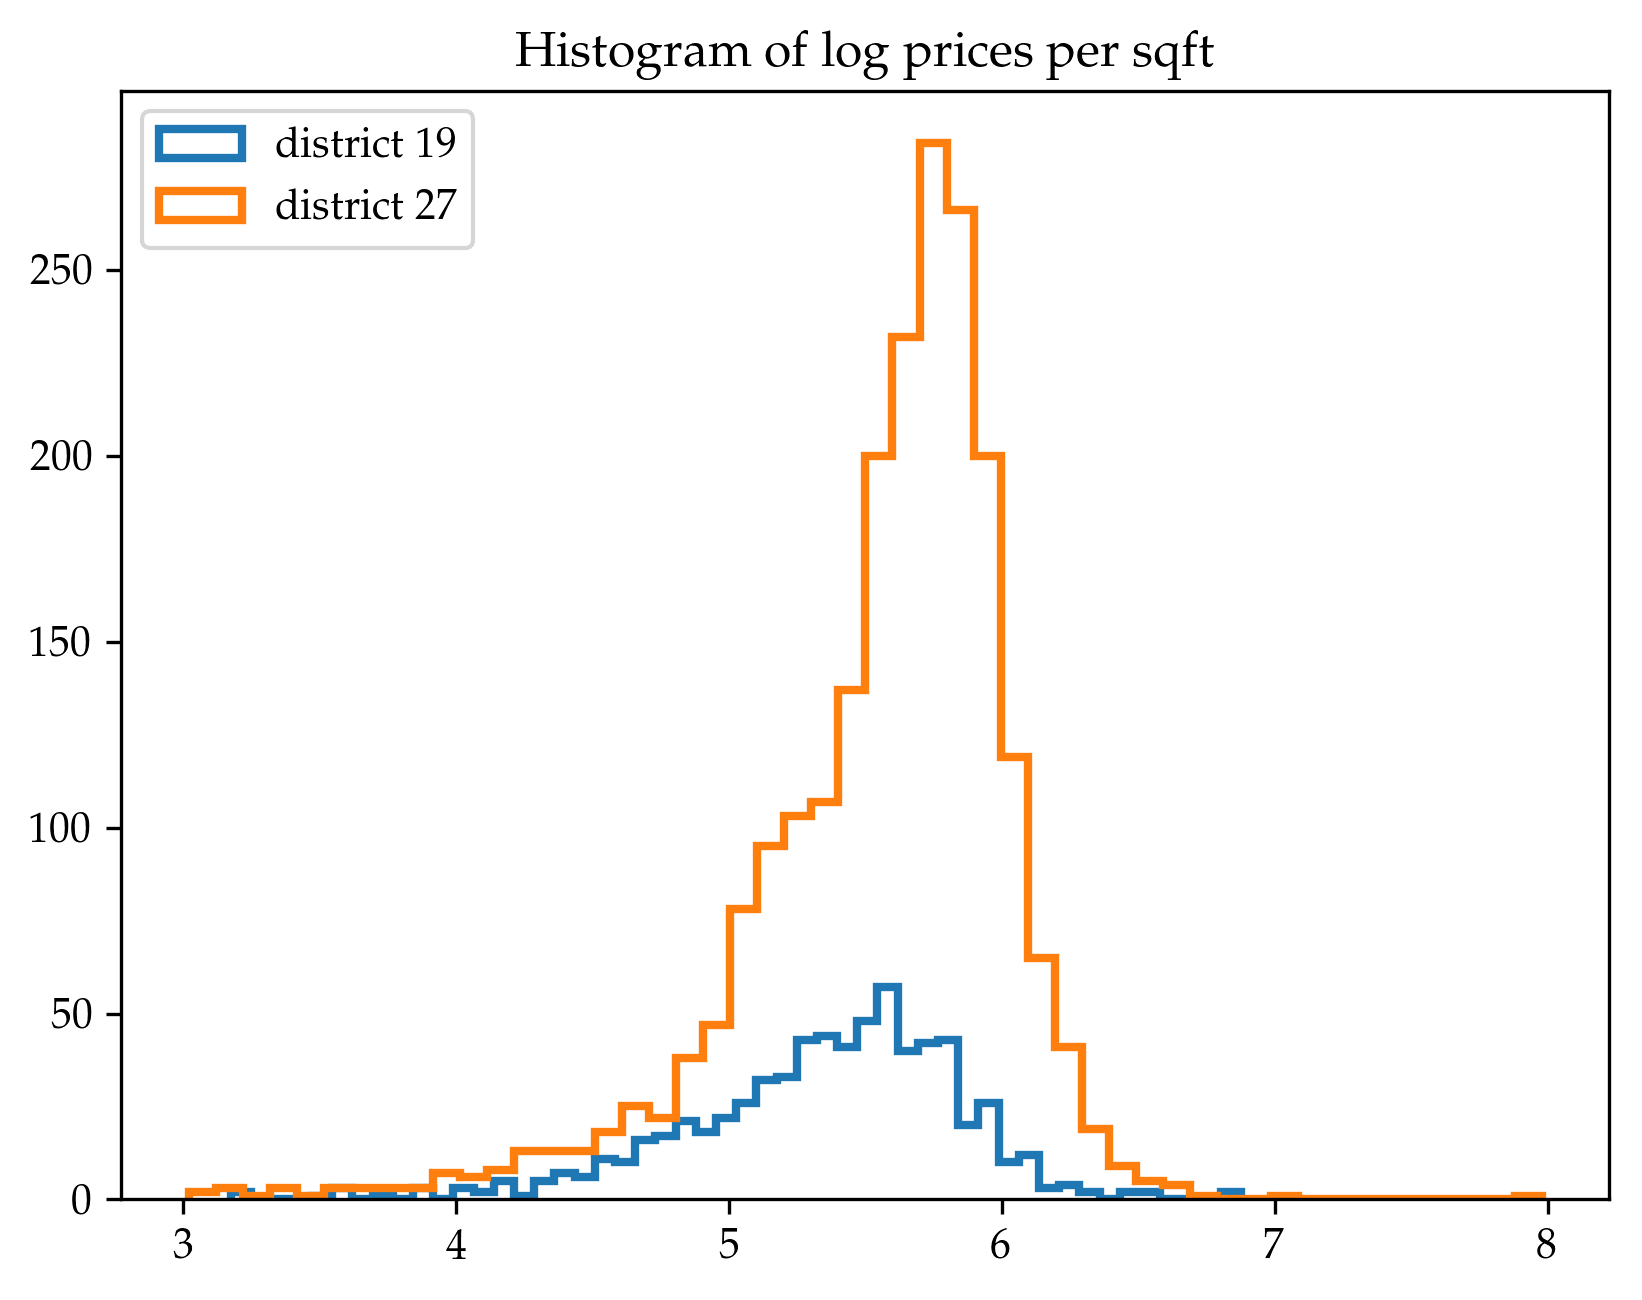

In [20]:
distrA = "19"
distrB = "27"
plt.plt[:hist](Y_dict[distrA],bins=50, histtype="step", label=@sprintf("district %s", distrA), linewidth=2)
plt.plt[:hist](Y_dict[distrB],bins=50, histtype="step", label=@sprintf("district %s", distrB), linewidth=2)
plt.title("Histogram of log prices per sqft")
plt.legend(loc="upper left")
plt.savefig("NYC_plots/sales_histogram_19-27.png")
plt.savefig("NYC_plots/sales_histogram_19-27.pdf")
;

In [21]:
# VERY PAINFUL CONVERSION CODE BECAUSE WE'RE USING
# DataTables AND ONLY DataFrames.jl HAS CODE
# FOR MODEL MATRICES
contrasts_dict = Dict()
BCATOS = filtered[:filtered][BUILDING_CLASS_AT_TIME_OF_SALE]
TCATOS = filtered[:filtered][TAX_CLASS_AT_TIME_OF_SALE]
for_mm = DataFrame(
    logSalePricePerSQFT = filtered[:filtered][:logSalePricePerSQFT].values,
    BUILDING_CLASS_AT_TIME_OF_SALE = DataArrays.PooledDataArray(
            DataArrays.RefArray(BCATOS.refs),  # d
            convert(Vector{String}, BCATOS.pool.levels),  # pool
            ),
    TAX_CLASS_AT_TIME_OF_SALE = DataArrays.PooledDataArray(
            DataArrays.RefArray(TCATOS.refs),  # d
            convert(Vector{String}, TCATOS.pool.levels),  # pool
            ),
    )
for_mm[1:10,:]

,logSalePricePerSQFT,BUILDING_CLASS_AT_TIME_OF_SALE,TAX_CLASS_AT_TIME_OF_SALE
1,6.928904507903688,B1,1.0
2,6.504838870596988,D1,2.0
3,7.0862580496737255,A6,1.0
4,6.922680929198812,A6,1.0
5,7.419473511836218,B1,1.0
6,7.733135993451006,A3,1.0
7,7.201512405008218,A8,1.0
8,7.555074394209042,A5,1.0
9,7.161535799758237,A6,1.0
10,7.40376581696299,C3,2.0


In [22]:
for (term,col) in DataFrames.eachcol(for_mm)
    DataFrames.is_categorical(col) || continue
    contrasts_dict[term] = DataFrames.FullDummyCoding()
end

In [23]:
import DataFrames: @formula, ModelMatrix, coefnames

In [24]:
mf=DataFrames.ModelFrame(@formula(logSalePricePerSQFT ~ BUILDING_CLASS_AT_TIME_OF_SALE + TAX_CLASS_AT_TIME_OF_SALE), 
    for_mm, 
    contrasts=contrasts_dict)
mm=ModelMatrix(mf)
p = size(mm,2)
D_=mm.m;

# Implement GP with covariates

In [25]:
σβ = 1.0
βkern_ = GaussianProcesses.LinIso(log(σβ))
type GPCovars   
    m:: Mean                # Mean object
    k::Kernel               # Kernel object
    βkern::Kernel
    logNoise::Float64       # log standard deviation of observation noise
    
    # Observation data
    nobsv::Int              # Number of observations
    X::Matrix{Float64}      # Input observations
    y::Vector{Float64}      # Output observations
    D::Array{Float64,2}
    data::KernelData        # Auxiliary observation data (to speed up calculations)
    βdata::KernelData
    p::Int                  # Dimensions of covariates
    dim::Int                # Dimension of inputs
    
    # Auxiliary data
    cK::AbstractPDMat       # (k + exp(2*obsNoise))
    alpha::Vector{Float64}  # (k + exp(2*obsNoise))⁻¹y
    mll::Float64            # Marginal log-likelihood
    dmll::Vector{Float64}   # Gradient marginal log-likelihood

    function GPCovars(X::Matrix{Float64}, 
        y::Vector{Float64}, 
        D::Matrix{Float64},
        m::Mean, 
        k::Kernel,
        βkern::Kernel,
        logNoise::Float64=-1e8,
        )
        dim, nobsv = size(X)
        p, nobsv2 = size(D)
        nobsv == nobsv2 || throw(ArgumentError("X and D should have the same number of rows"))
        length(y) == nobsv || throw(ArgumentError("X and y should have the same number of rows"))
        gp = new(m, k, βkern, logNoise, nobsv, X, y, D, KernelData(k, X), KernelData(βkern, D), p, dim)
        update_mll!(gp)
        return gp
    end
end

In [26]:
function update_mll!(gp::GPCovars, cK::Matrix{Float64})
    μ = mean(gp.m, gp.X)
    cov!(cK, gp.βkern, gp.D, gp.βdata)
    addcov!(cK, gp.k, gp.X, gp.data)
    for i in 1:gp.nobsv
        cK[i,i] += max(exp(2*gp.logNoise),1e-8)
    end
    gp.cK = PDMat(cK)
    gp.alpha = gp.cK \ (gp.y .- μ)
    gp.mll = -dot((gp.y-μ),gp.alpha)/2.0 - logdet(gp.cK)/2.0 - gp.nobsv*log(2π)/2.0
end
function update_mll!(gp::GPCovars)
    Σbuffer = Array{Float64}(gp.nobsv, gp.nobsv)
    update_mll!(gp, Σbuffer)
end
function update_mll!!(gp::GPCovars)
    cK = gp.cK.mat
    μ = mean(gp.m, gp.X)
    cov!(cK, gp.βkern, gp.D, gp.βdata)
    addcov!(cK, gp.k, gp.X, gp.data)
    for i in 1:gp.nobsv
        cK[i,i] += max(exp(2*gp.logNoise),1e-8)
    end
    chol_buffer = gp.cK.chol.factors
    copy!(chol_buffer, cK)
    chol = cholfact!(Symmetric(chol_buffer))
    gp.cK = PDMats.PDMat(cK, chol)
    gp.alpha = gp.cK \ (gp.y - μ)
    gp.mll = -dot((gp.y - μ),gp.alpha)/2.0 - logdet(gp.cK)/2.0 - gp.nobsv*log(2π)/2.0 # Marginal log-likelihood
end
function get_ααinvcKI!(ααinvcKI::Matrix, cK::AbstractPDMat, α::Vector)
    nobsv = length(α)
    size(ααinvcKI) == (nobsv, nobsv) || throw(ArgumentError, 
                @sprintf("Buffer for ααinvcKI should be a %dx%d matrix, not %dx%d",
                         nobsv, nobsv,
                         size(ααinvcKI,1), size(ααinvcKI,2)))
    ααinvcKI[:,:] = 0.0
    @inbounds for i in 1:nobsv
        ααinvcKI[i,i] = -1.0
    end
    A_ldiv_B!(cK.chol, ααinvcKI)
    LinAlg.BLAS.ger!(1.0, α, α, ααinvcKI)
end

get_ααinvcKI! (generic function with 1 method)

In [27]:
""" Update gradient of marginal log-likelihood """
function update_mll_and_dmll!(gp::GPCovars,
    Kgrad::Matrix{Float64},
    ααinvcKI::Matrix{Float64}
    ; 
    noise::Bool=true, # include gradient component for the logNoise term
    mean::Bool=true, # include gradient components for the mean parameters
    kern::Bool=true, # include gradient components for the spatial kernel parameters
    beta::Bool=true, # include gradient components for the linear regression prior terms
    )
    update_mll!!(gp)
    n_mean_params = num_params(gp.m)
    n_kern_params = num_params(gp.k)
    n_beta_params = num_params(gp.βkern)
    gp.dmll = Array{Float64}(noise + mean*n_mean_params + kern*n_kern_params + beta*n_beta_params)
    logNoise = gp.logNoise
    get_ααinvcKI!(ααinvcKI, gp.cK, gp.alpha)
    i=1
    if noise
        gp.dmll[i] = exp(2.0*logNoise)*trace(ααinvcKI)
        i+=1
    end
    if mean
        Mgrads = grad_stack(gp.m, gp.X)
        for j in 1:n_mean_params
            gp.dmll[i] = dot(Mgrads[:,j],gp.alpha)
            i += 1
        end
    end
    if kern
        for iparam in 1:n_kern_params
            grad_slice!(Kgrad, gp.k, gp.X, gp.data, iparam)
            gp.dmll[i] = dot(Kgrad,ααinvcKI)/2.0
            i+=1
        end
    end
    if beta
        for iparam in 1:n_beta_params
            grad_slice!(Kgrad, gp.βkern, gp.D, gp.βdata, iparam)
            gp.dmll[i] = vecdot(ααinvcKI,Kgrad)/2.0
            i+=1
        end
    end
end
function set_params!(gp::GPCovars, hyp::Vector{Float64}; 
                    noise::Bool=true, mean::Bool=true, kern::Bool=true, beta::Bool=true)
    i=1
    if noise
        gp.logNoise = hyp[i]
        i+=1
    end
    if mean
        set_params!(gp.m, hyp[i:i+num_params(gp.m)-1])
        i+=num_params(gp.m)
    end
    if kern
        set_params!(gp.k, hyp[i:i+num_params(gp.k)-1])
        i+=num_params(gp.k)
    end
    if beta
        set_params!(gp.βkern, hyp[i:i+num_params(gp.βkern)-1])
        i+=num_params(gp.βkern)
    end
end
function get_params(gp::GPCovars; noise::Bool=true, mean::Bool=true, kern::Bool=true, beta::Bool=true)
    params = Float64[]
    if noise; push!(params, gp.logNoise); end
    if mean;  append!(params, get_params(gp.m)); end
    if kern; append!(params,  get_params(gp.k)); end
    if beta; append!(params,  get_params(gp.βkern)); end
    return params
end
function optimize!(gp::GPCovars; noise::Bool=true, mean::Bool=true, kern::Bool=true, beta::Bool=true, 
                    method::Optim.Optimizer=ConjugateGradient(), 
                    options::Optim.Options=Optim.Options())
    Kgrad_buffer = Array{Float64}(gp.nobsv, gp.nobsv)
    ααinvcKI = Array{Float64}(gp.nobsv, gp.nobsv)
    function mll(hyp::Vector{Float64})
        try
            set_params!(gp, hyp; noise=noise, mean=mean, kern=kern, beta=beta)
            update_mll!!(gp)
            return -gp.mll
        catch err
             if !all(isfinite(hyp))
                println(err)
                return Inf
            elseif isa(err, ArgumentError)
                println(err)
                return Inf
            elseif isa(err, Base.LinAlg.PosDefException)
                println(err)
                return Inf
            else
                throw(err)
            end
        end        
    end

    function mll_and_dmll!(grad::Vector{Float64}, hyp::Vector{Float64})
        try
            set_params!(gp, hyp; noise=noise, mean=mean, kern=kern, beta=beta)
            update_mll_and_dmll!(gp, Kgrad_buffer, ααinvcKI; noise=noise, mean=mean, kern=kern, beta=beta)
            grad[:] = -gp.dmll
            return -gp.mll
        catch err
             if !all(isfinite(hyp))
                println(err)
                return Inf
            elseif isa(err, ArgumentError)
                println(err)
                return Inf
            elseif isa(err, Base.LinAlg.PosDefException)
                println(err)
                return Inf
            else
                throw(err)
            end
        end 
    end
    function dmll!(grad::Vector{Float64}, hyp::Vector{Float64})
        mll_and_dmll!(grad, hyp)
    end
    
    init = get_params(gp;  noise=noise, mean=mean, kern=kern, beta=beta)  # Initial hyperparameter values
    func = OnceDifferentiable(mll, dmll!, mll_and_dmll!, init)
    results=optimize(func,init,method,options)
    set_params!(gp, Optim.minimizer(results); noise=noise, mean=mean, kern=kern, beta=beta)
    return results
end
;

# Optimize hyperparameters using district 27

I start by optimizing the hyperparameters $\beta_0$, $\sigma_\beta$, $\sigma_f$, $\ell$ and $\sigma_y$ using only data for district 27 (the larger of the two, with {{length(Y_dict["27"])}} sales). Optimizing within a single district makes it computationally quicker and easier to implement, and ensures that there is no interference from the treatment effect.

In [29]:
district="27" # bigger district of the two
# GP_dict=Dict{String, GP}()
σf = 0.2
σy = 0.2
L = 1300.0
_kern = SEIso(log(L), log(σf))
k_wmean = SEIso(log(L), log(σf)) + fix(GeoRDD.ConstantKernel(log(10.0)))
_logNoise = log(σy)
_X = X_dict[district]'
_Y = Y_dict[district]
_Dd = D_[schdistr_indices[district],:]'
_m = MeanConst(mean(_Y))
gp27=GPCovars(_X, _Y, _Dd, _m, _kern, βkern_, _logNoise)
;

In [30]:
βkern_2 = GaussianProcesses.LinIso(log(1.0))
gp27_mean=GPCovars(_X, _Y, _Dd, _m, k_wmean, βkern_2, _logNoise)
;

The optimization takes a very reasonable 20-30 seconds.

In [31]:
@time opt_out=optimize!(gp27, options=Optim.Options(x_tol=1e-8, f_tol=1e-8));

 77.998032 seconds (8.56 M allocations: 474.647 MiB, 1.01% gc time)


In [32]:
@time opt_out_mean=optimize!(gp27_mean, options=Optim.Options(x_tol=1e-8, f_tol=1e-8));

 74.788586 seconds (1.97 M allocations: 6.759 GiB, 2.47% gc time)


In [33]:
opt_out

Results of Optimization Algorithm
 * Algorithm: Conjugate Gradient
 * Starting Point: [-1.6094379124341003,5.561631547991561, ...]
 * Minimizer: [-0.8725214522004645,5.534317639692799, ...]
 * Minimum: 1.266922e+03
 * Iterations: 26
 * Convergence: true
   * |x - x'| < 1.0e-08: false 
     |x - x'| = 1.03e-04 
   * |f(x) - f(x')| / |f(x)| < 1.0e-08: true
     |f(x) - f(x')| / |f(x)| = 6.25e-09 
   * |g(x)| < 1.0e-08: false 
     |g(x)| = 1.01e-01 
   * stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 67
 * Gradient Calls: 48

The fitted hyperparameters are:

| Parameter      | Fitted Value                             |
|----------------|------------------------------------------|
| $\sigma_y$     | {{@sprintf("%.4f", exp(gp27.logNoise))}} |
| $\sigma_f$     | {{@sprintf("%.4f", √(gp27.k.σ2))}}        |
| $\sigma_\beta$ | {{@sprintf("%.4f", 1/√gp27.βkern.ℓ2)}}   |
| $\ell$ (feet)   | {{@sprintf("%.4f", √(gp27.k.ℓ2))}}       |

The fitted hyperparameters with mean uncertainty are:

| Parameter      | Fitted Value                             |
|----------------|------------------------------------------|
| $\sigma_y$     | {{@sprintf("%.4f", exp(gp27_mean.logNoise))}} |
| $\sigma_f$     | {{@sprintf("%.4f", √(gp27_mean.k.kerns[1].σ2))}}        |
| $\sigma_\beta$ | {{@sprintf("%.4f", 1/√gp27_mean.βkern.ℓ2)}}   |
| $\ell$ (feet)   | {{@sprintf("%.4f", √(gp27_mean.k.kerns[1].ℓ2))}}       |

In [42]:
@printf("σ_y: %.4f\n", exp(gp27.logNoise))
@printf("σ_f: %.4f\n", √(gp27.k.σ2))
@printf("σ_β: %.4f\n", 1/√gp27.βkern.ℓ2)
@printf("ℓ: %.4f\n", √(gp27.k.ℓ2))

σ_y: 0.4179
σ_f: 0.2418
σ_β: 0.1244
ℓ: 3364.1115


In [43]:
@printf("σ_y: %.4f\n", exp(gp27_mean.logNoise))
@printf("σ_f: %.4f\n", √(gp27_mean.k.kerns[1].σ2))
@printf("σ_β: %.4f\n", 1/√gp27_mean.βkern.ℓ2)
@printf("ℓ: %.4f\n", √(gp27_mean.k.kerns[1].ℓ2))

σ_y: 0.4179
σ_f: 0.2419
σ_β: 0.1307
ℓ: 3370.9578


# Get posterior mean $\hat\beta$

With these hyperparameters in hand, I extract the posterior mean of the linear regression parameters $\beta_{1j}$ and $\beta_{2j}$, again only using district 27 data. This makes our lives easier, and I've convinced myself in other examples that it makes very little difference.

In [44]:
function get_ΣYβ(gp::GPCovars)
    Σ = cov(gp.k, gp.X, gp.data)
    for i in 1:gp.nobsv
        Σ[i,i] += max(exp(2*gp27.logNoise),1e-8)
    end
    return PDMats.PDMat(Σ)
end
;

Obtaining the posterior means is pretty quick, about 0.5 seconds.

In [45]:
@time ΣY_β = get_ΣYβ(gp27);

  0.849155 seconds (204.46 k allocations: 84.978 MiB, 4.50% gc time)


In [46]:
tmp = PDMats.X_invA_Xt(ΣY_β, gp27.D)
for i in 1:p
    tmp[i,i] += gp27.βkern.ℓ2
end
m = mean(gp27.m,gp27.X)
βhat = (tmp \ gp27.D) * (ΣY_β \ (gp27.y.-m))
βhat_dict=Dict(zip(coefnames(mf), βhat))
;

# Fit GPs to residuals

I then go back to the other school districts, obtain their residuals from the linear regression, and fit $\gp$'s to the residuals (using the hyperparameter values fitted on district 27), with constant mean set to the mean of the residuals. I then look at the boundary between districts 19 and 27, using our machinery to obtain a treatment effect cliff face, and an inverse-variance weighted average.

In [47]:
resid = for_mm[:logSalePricePerSQFT] - D_*βhat
resid_dict=Dict{String, Vector{Float64}}()
for name in schdistrs
    resid_dict[name] = resid[schdistr_indices[name]]
end

In [48]:
resid_GP_dict=Dict{String, GPE}()
for name in schdistrs
    X = X_dict[name]
    if size(X,1)==0
        continue
    end
    Y = resid_dict[name]
    fit = GPE(X', Y, MeanConst(mean(Y)), gp27.k, gp27.logNoise)
    resid_GP_dict[name] = fit
end

In [49]:
distrA,distrB="19","27"
resid_μposterior, resid_Σposterior = GeoRDD.cliff_face(
            resid_GP_dict[distrA], 
            resid_GP_dict[distrB],
            hcat(sentinels[distrA,distrB].coordinates...))
;

## Cliff face

In [50]:
function plot_cliffface(μ, Σ, color; label=L"posterior of $\tau(x)$ on residuals")
    plt.plot(μ, color=color, ".", label=label)
    msize=15
    plt.plot(1,μ[1], color=cbbPalette[5], 
        markersize=msize, marker="o")
    plt.plot(length(μ),μ[end], color=cbbPalette[4], 
        markersize=msize, marker="o")
    plt.plot(μ.+2*sqrt.(diag(Σ)), color=color, linestyle=":")
    plt.plot(μ.-2*sqrt.(diag(Σ)), color=color, linestyle=":")
end

plot_cliffface (generic function with 1 method)

For context, I also have a plot of the sentinel point locations in both districts. The districts are on the coastline, so some of the boundary runs in the water, and then there's some sentinels on an island in Jamaica Bay. In the treatment effect cliff face that follows, we see a corresponding discontinuous jump in $\tau(x)$ and its posterior variance.

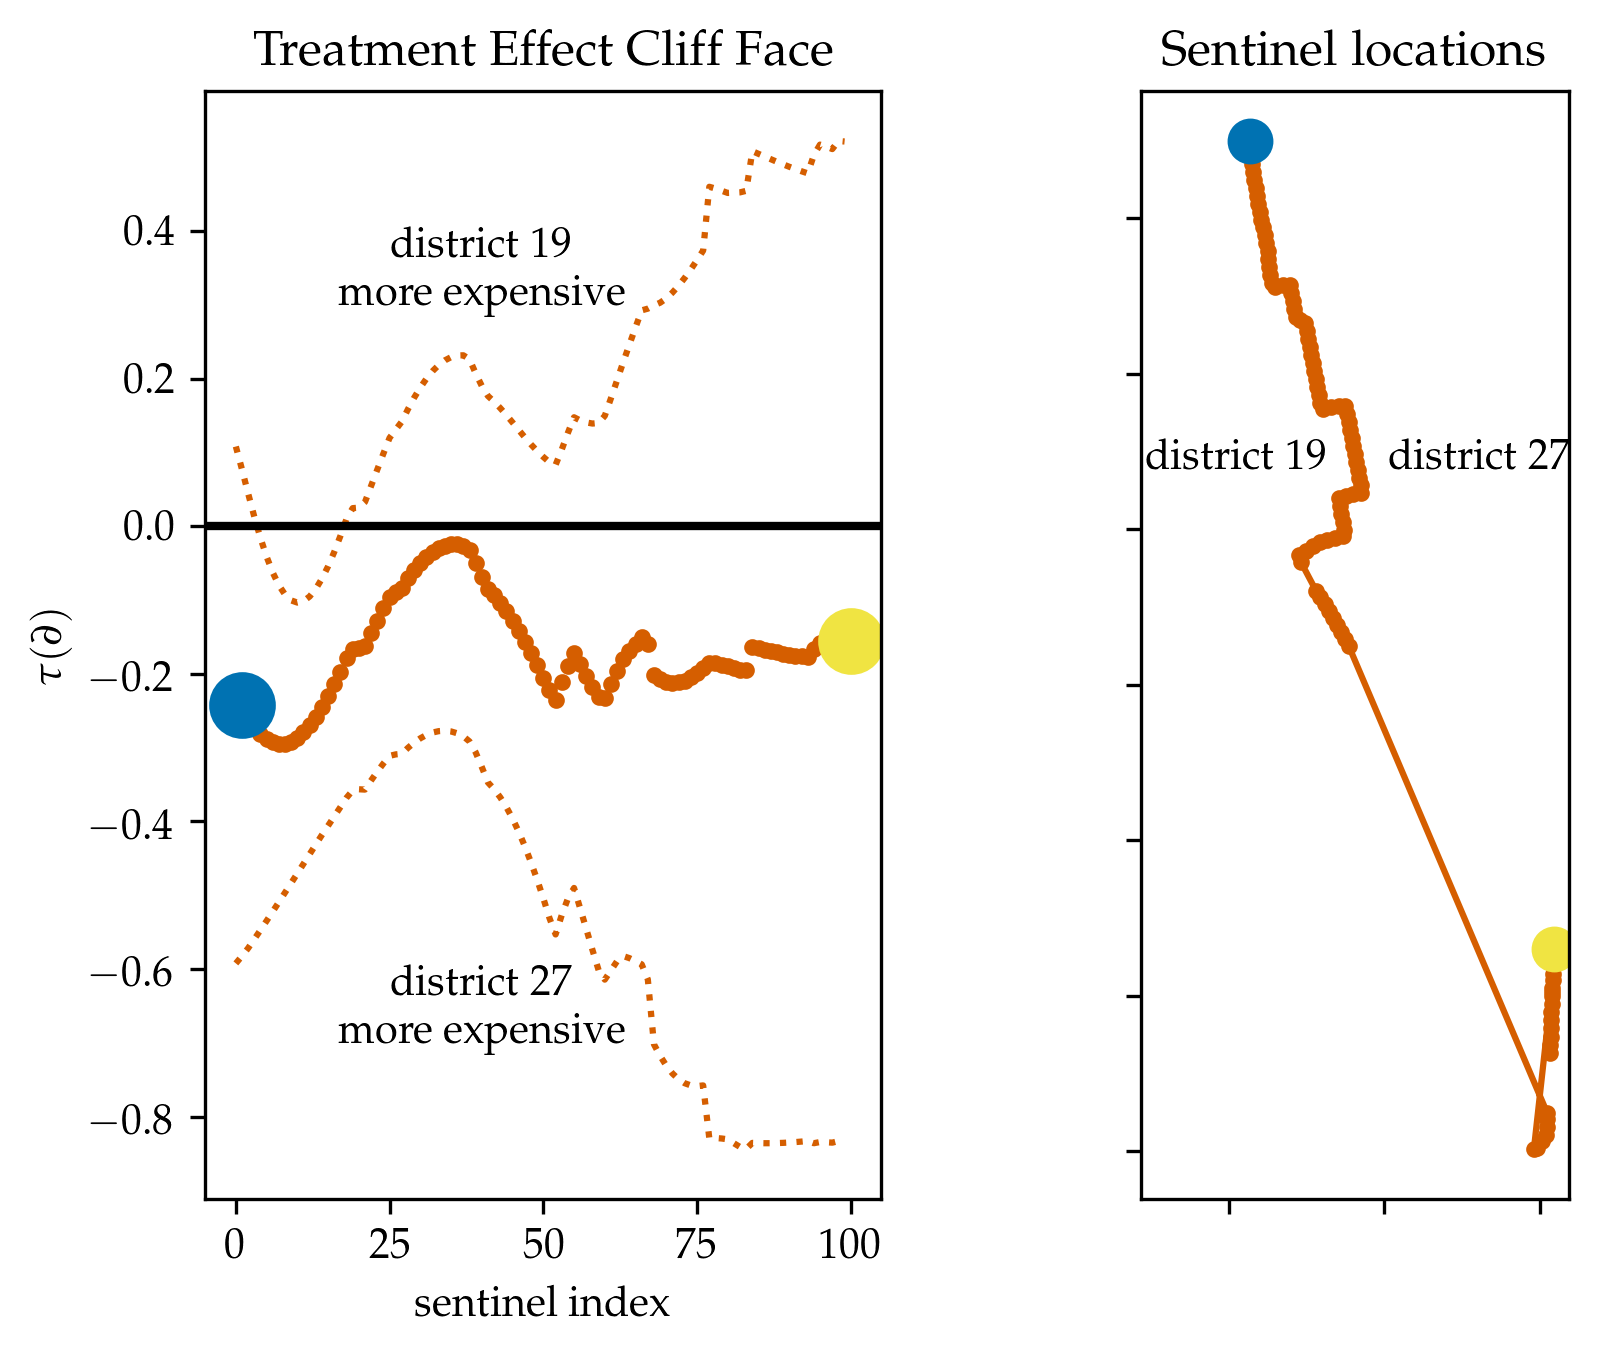

In [51]:
msize=10
PyPlot.plt[:interactive](true)
plt.subplot(1,2,2)
plt.title("Sentinel locations")
PyPlot.plt[:interactive](false)
X◫ = hcat(sentinels[distrA,distrB].coordinates...)
plt.plot(X◫[1,:], X◫[2,:], linestyle="-", marker=".", color=color=cbbPalette[6])
plt.plot(X◫[1,1], X◫[2,1], "o", color=cbbPalette[5], markersize=msize, label="first point")
plt.plot(X◫[1,end], X◫[2,end], "o", color=cbbPalette[4], markersize=msize, label="last point")
plt.text(X◫[1,50]+1000,X◫[2,50], "district 27", horizontalalignment="left")
plt.text(X◫[1,50]-1000,X◫[2,50], "district 19", horizontalalignment="right")
ax = plt.gca()
ax[:set_xticklabels]([])
ax[:set_yticklabels]([])
ax[:set_aspect]("equal")
plt.xlim(plt.xlim()[1]-3000,plt.xlim()[2])
plt.subplot(1,2,1)
plt.title("Treatment Effect Cliff Face")
plot_cliffface(resid_μposterior, resid_Σposterior, cbbPalette[6])
plt.axhline(y=0, color="black", linewidth=2)
plt.text(40, 0.3,  "district 19\nmore expensive", horizontalalignment="center")
plt.text(40, -0.7, "district 27\nmore expensive", horizontalalignment="center")
plt.ylabel(L"\tau(\partial)")
plt.xlabel("sentinel index")
# plt.legend()
PyPlot.plt[:interactive](true)
;

**Note on sign of $\tau(x)$:** The inputs to the cliff face function are the treatment-side fitted $\gp$, followed by the control-side $\gp$. The cliff-face itself is treatment minus control. In our case, treatment is district 19, and control is district 27 (the order is completely arbitrary).
Therefore, a *positive* treatment effect means property are more expensive in district 19.

The following plot just shows the posterior standard deviation against the latitude of the sentinel points (the Northmost sentinel point is on the right of this plot, so it's horizontally flipped from the cliff face plot above). We see that the standard deviation is lowest in the most densely populated part of the boundary, and very high on the island.

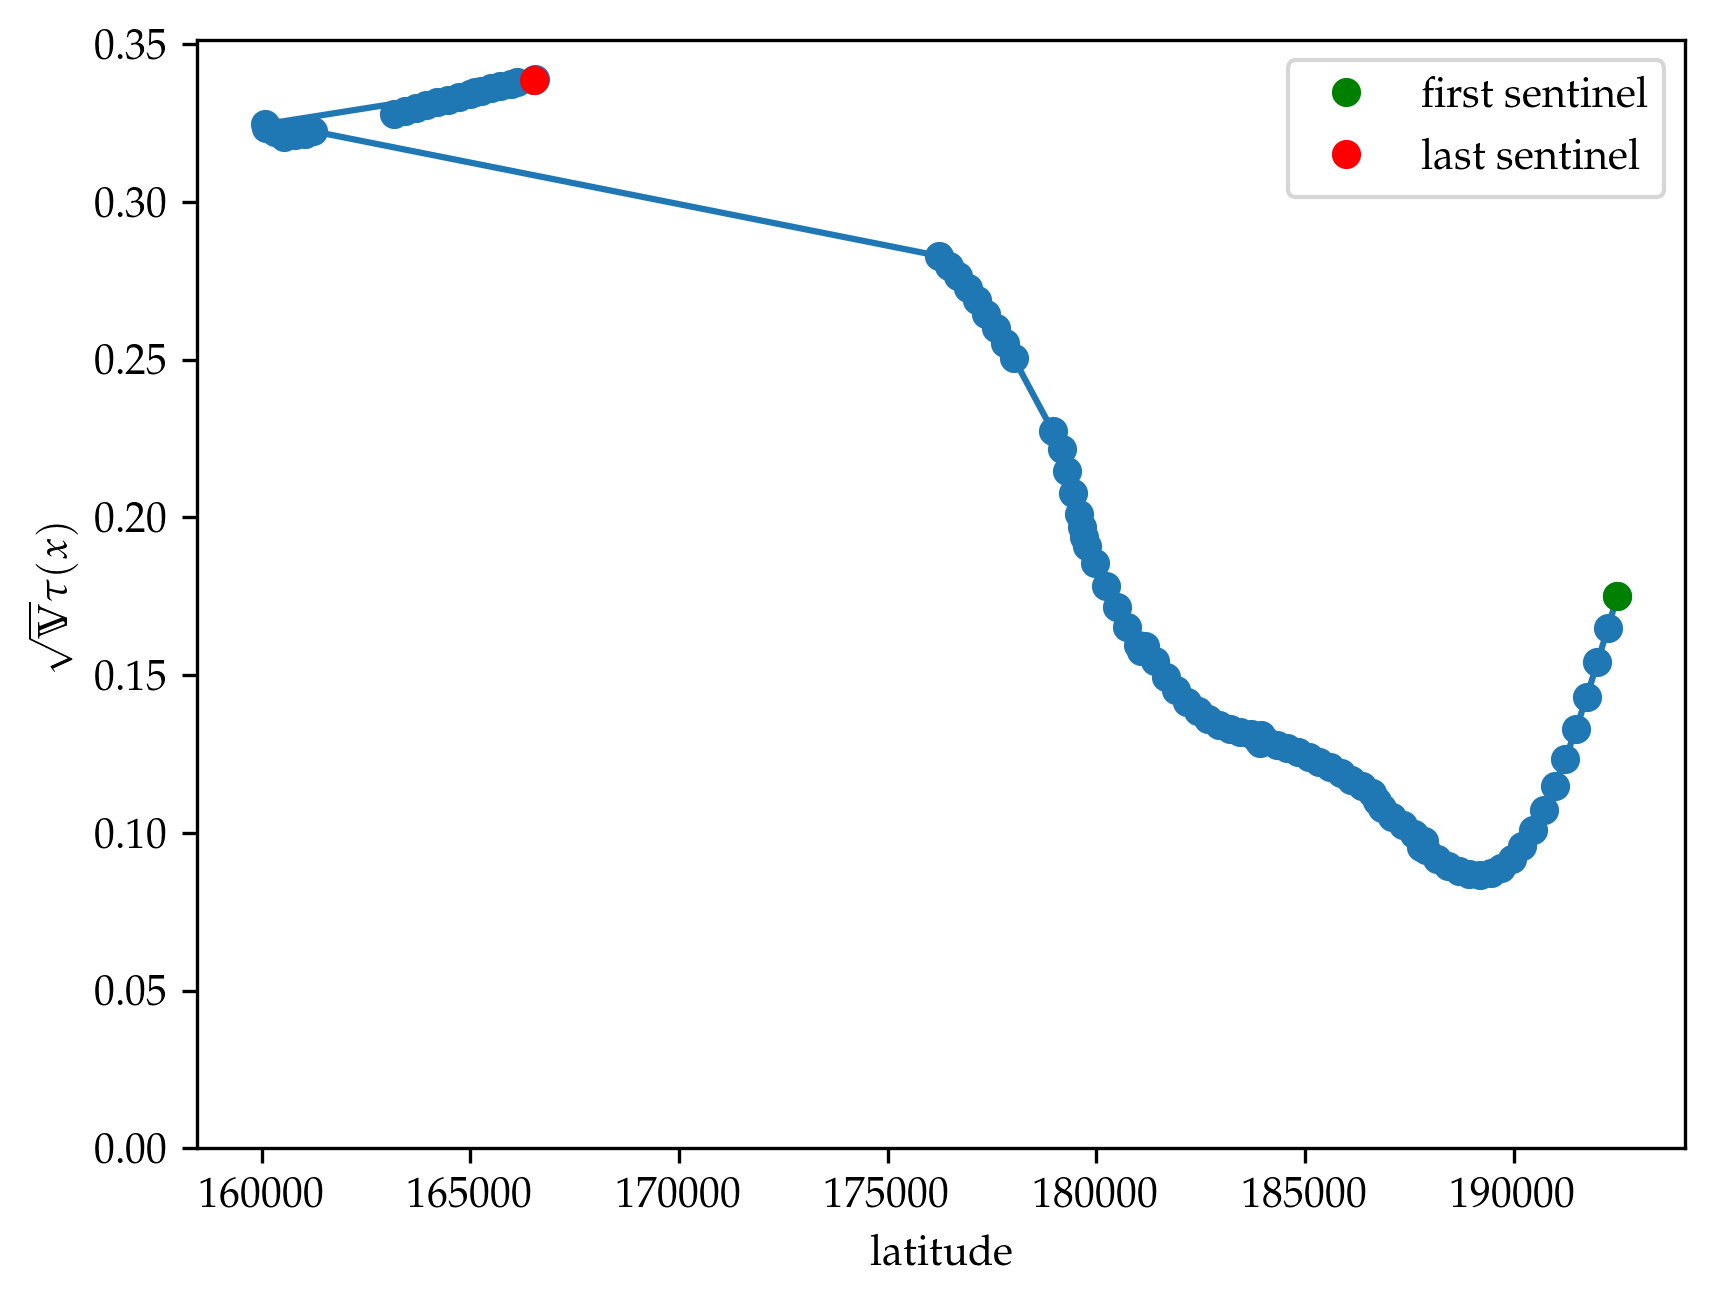

PyObject <matplotlib.legend.Legend object at 0x15710ff28>

In [52]:
begin
    X◫ = hcat(sentinels[distrA,distrB].coordinates...)
    plt.plot(X◫[2,:], sqrt.(diag(resid_Σposterior)), "-o")
    plt.plot(X◫[2,1], sqrt(diag(resid_Σposterior)[1]), color="green", "o", label="first sentinel")
    plt.plot(X◫[2,end], sqrt(diag(resid_Σposterior)[end]), color="red", "o", label="last sentinel")
    plt.ylim(0)
    plt.xlabel("latitude")
    plt.ylabel(L"\sqrt\mathbb{V}\tau(x)")
    plt.legend(loc="best")
end

### Cliff face parametric bootstrap

In [53]:
@time boot_cliffs = GeoRDD.nsim_cliff(resid_GP_dict[distrA], 
                                      resid_GP_dict[distrB], 
                                      hcat(sentinels[distrA,distrB].coordinates...), 
                                      100; 
                                      update_mean=true);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] !(::BitArray{1}) at ./deprecated.jl:57
 [3] #sim_cliff#25(::Bool, ::Function, ::GaussianProcesses.GPE, ::GaussianProcesses.GPE, ::GaussianProcesses.GPE, ::BitArray{1}, ::Array{Float64,2}) at /Users/imolk/Documents/Harvard/Miratrix/rdd-coverage/Maxime/src/cliff_face.jl:17
 [4] (::GeoRDD.#kw##sim_cliff)(::Array{Any,1}, ::GeoRDD.#sim_cliff, ::GaussianProcesses.GPE, ::GaussianProcesses.GPE, ::GaussianProcesses.GPE, ::BitArray{1}, ::Array{Float64,2}) at ./<missing>:0
 [5] collect(::Base.Generator{UnitRange{Int64},GeoRDD.##27#28{Bool,Array{Float64,2},GaussianProcesses.GPE,GaussianProcesses.GPE,GaussianProcesses.GPE,BitArray{1}}}) at ./array.jl:441
 [6] #nsim_cliff#26(::Bool, ::Function, ::GaussianProcesses.GPE, ::GaussianProcesses.GPE, ::Array{Float64,2}, ::Int64) at /Users/imolk/Documents/Harvard/Miratrix/rdd-coverage/Maxime/src/cliff_face.jl:40
 [7] (::GeoRDD.#kw##nsim_cliff)(::Array{Any,1}, ::GeoRDD.#nsim_cliff, ::Gau

 10.785052 seconds (625.12 k allocations: 1.061 GiB, 3.56% gc time)


In [54]:
chi_indep = mean(resid_μposterior.^2 ./ diag(resid_Σposterior))

1.803134178167039

In [55]:
boot_chi_indep = [mean(boot_cliffs[j][1].^2 ./ diag(boot_cliffs[j][2])) for j in 1:length(boot_cliffs)];

In [56]:
mean(boot_chi_indep .> chi_indep)

0.05

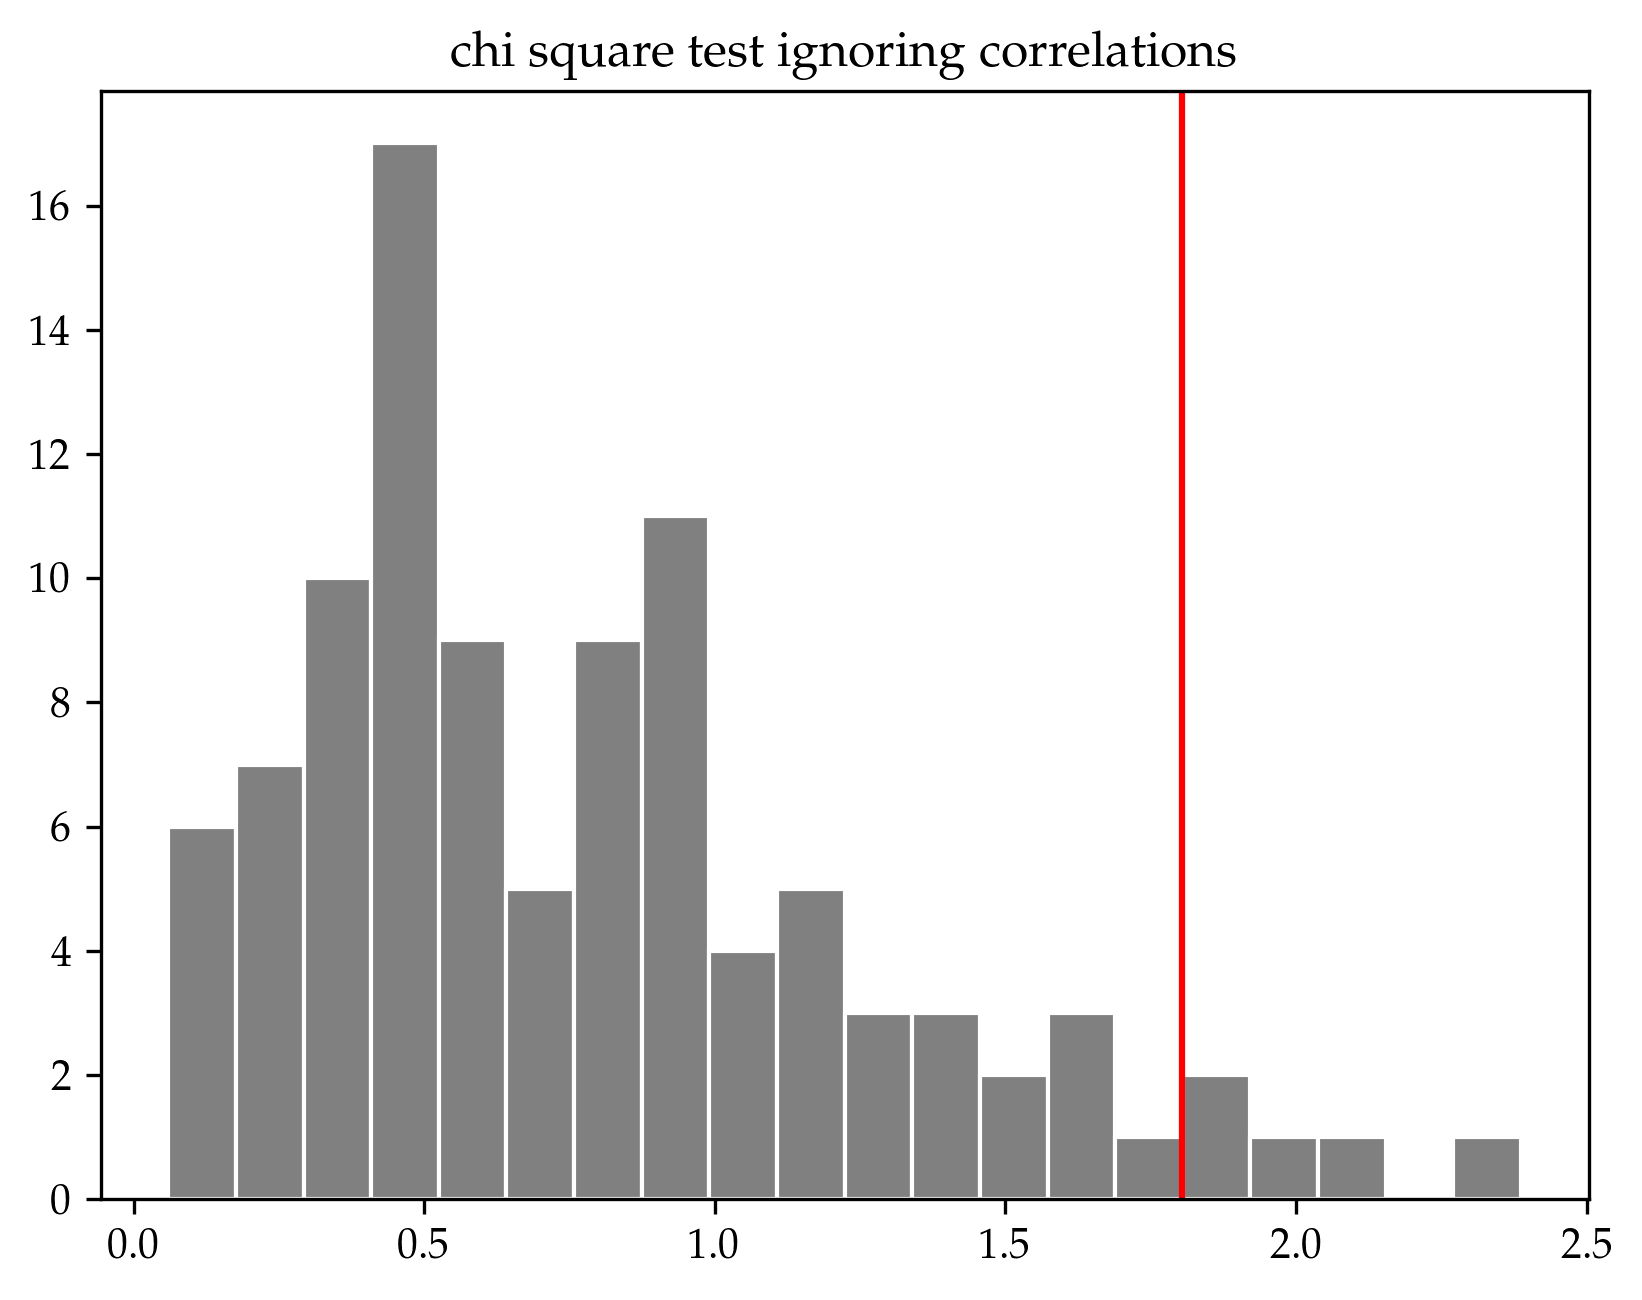

In [57]:
plt.plt[:hist](boot_chi_indep, color="grey", edgecolor="white", bins=20)
plt.axvline(chi_indep, color="red")
plt.title("chi square test ignoring correlations")
;

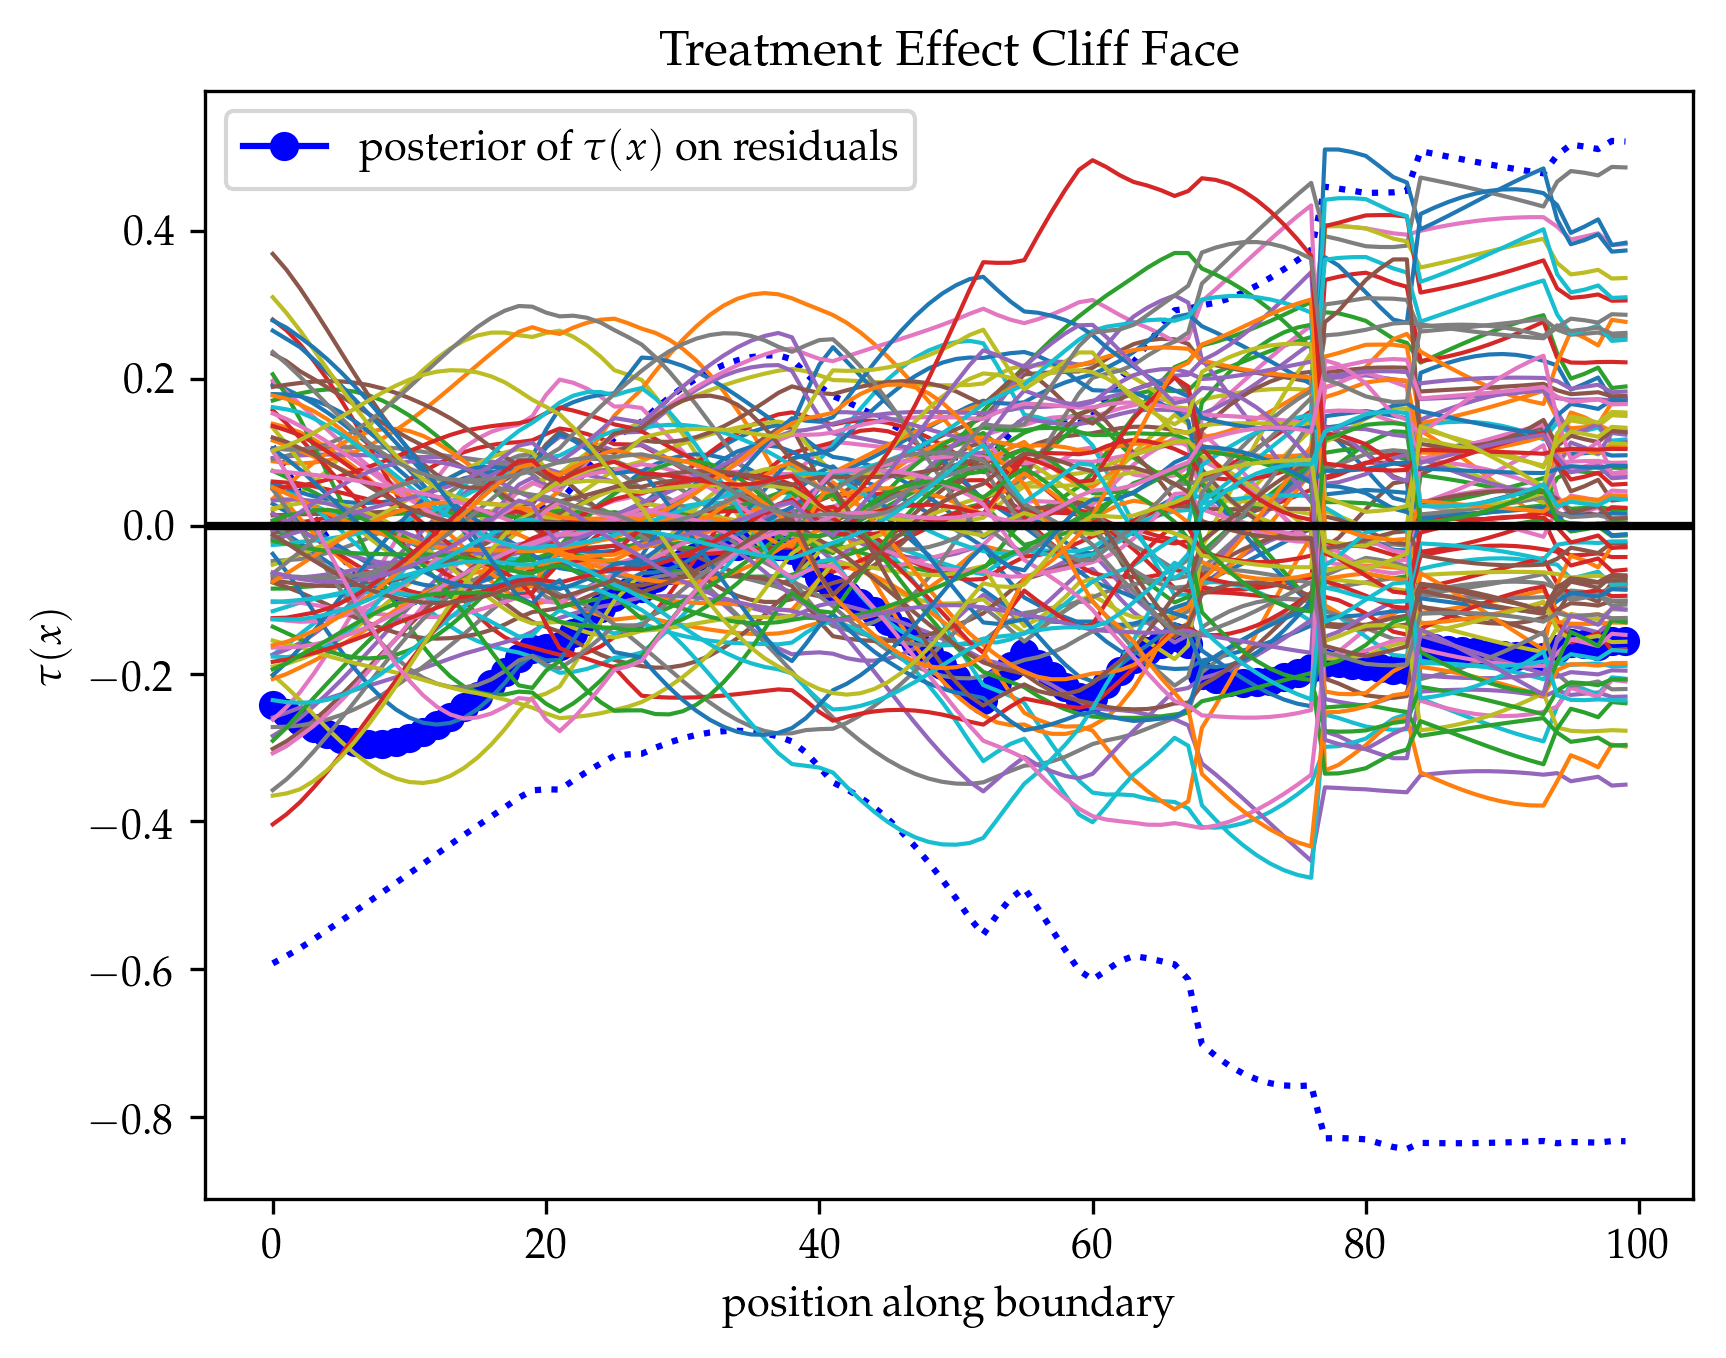

In [58]:
PyPlot.plt[:interactive](true)
plt.title("Treatment Effect Cliff Face")
PyPlot.plt[:interactive](false)
plt.plot(resid_μposterior, color="blue", "-o", label=L"posterior of $\tau(x)$ on residuals")
plt.plot(resid_μposterior.+2*sqrt.(diag(resid_Σposterior)), color="blue", linestyle=":")
plt.plot(resid_μposterior.-2*sqrt.(diag(resid_Σposterior)), color="blue", linestyle=":")
for j in 1:length(boot_cliffs)
    plt.plot(boot_cliffs[j][1], linewidth=1)
end
plt.axhline(y=0, color="black", linewidth=2)
plt.ylabel(L"\tau(x)")
plt.xlabel("position along boundary")
plt.legend()
PyPlot.plt[:interactive](true)
;

## adding mean kernel

In the 1D simulations, I noticed that adding a constant kernel to account
for uncertainty in the mean could improve coverage significantly.
My intuition is that here we have enough data that the uncertainty
in the mean is very low, but I still want to check that the cliff face isn't
unduly affected by the change.

To be clear, by “constant kernel”, I mean that the kernel $k(\svec, \svec')$ is modified
to $k*$:
$$k*(\svec,\svec') = k(\svec,\svec') + \sigma_\mu^2$$

In [59]:
wmean_GP_dict=Dict{String, GPE}()
for name in schdistrs
    X = X_dict[name]
    if size(X,1)==0
        continue
    end
    Y = resid_dict[name]
    fit = GPE(X', Y, MeanConst(mean(Y)), k_wmean, gp27_mean.logNoise)
    wmean_GP_dict[name] = fit
end

In [60]:
wmean_μposterior, wmean_Σposterior = GeoRDD.cliff_face(
            wmean_GP_dict[distrA], 
            wmean_GP_dict[distrB],
            hcat(sentinels[distrA,distrB].coordinates...))
;

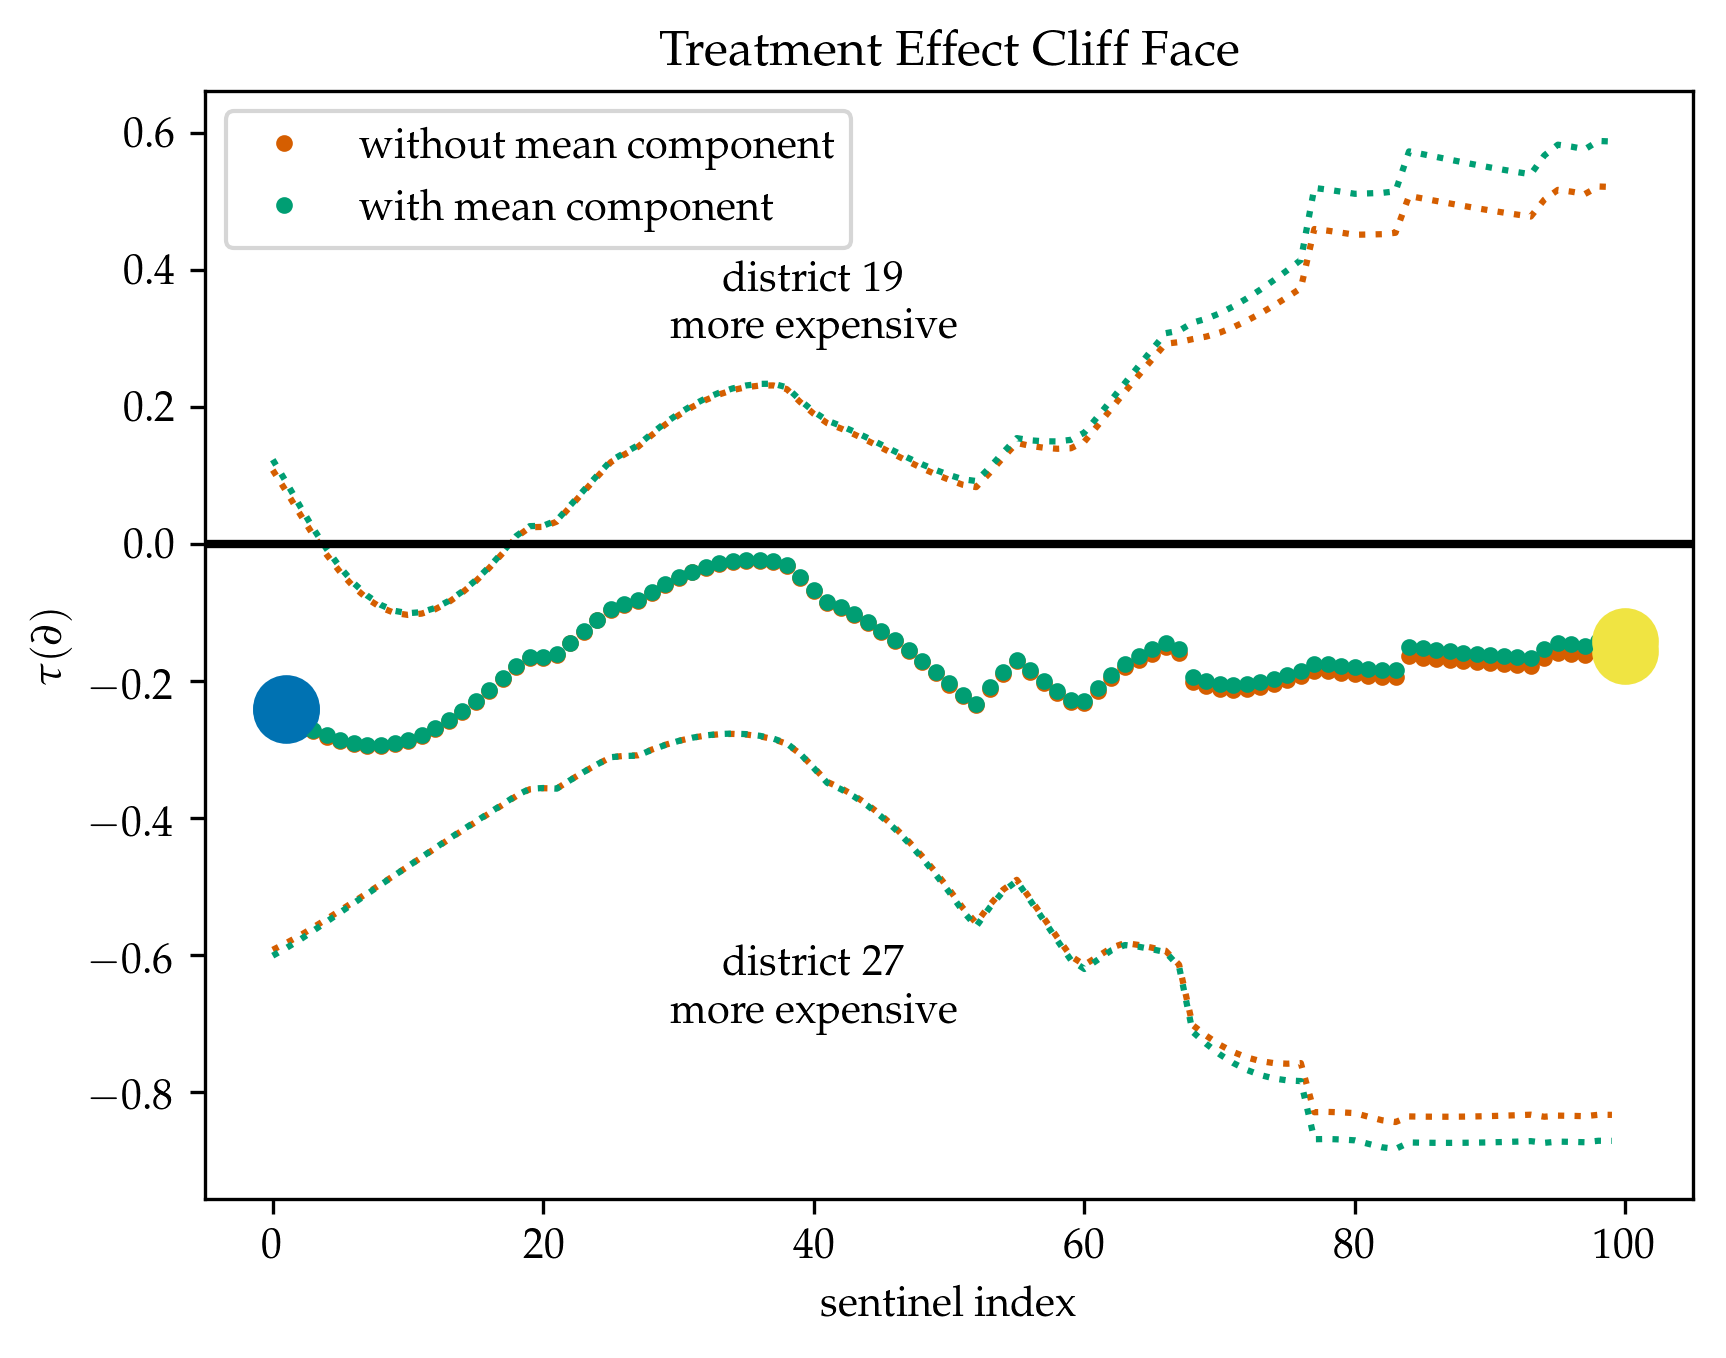

In [61]:
plt.title("Treatment Effect Cliff Face")
plot_cliffface(resid_μposterior, resid_Σposterior, cbbPalette[6]; label="without mean component")
plot_cliffface(wmean_μposterior, wmean_Σposterior, cbbPalette[3]; label="with mean component")
plt.axhline(y=0, color="black", linewidth=2)
plt.text(40, 0.3,  "district 19\nmore expensive", horizontalalignment="center")
plt.text(40, -0.7, "district 27\nmore expensive", horizontalalignment="center")
plt.ylabel(L"\tau(\partial)")
plt.xlabel("sentinel index")
plt.legend(loc="best")
;

It's reassuring that it made virtually no difference in this case. It means we can continue to ignore the uncertainty in the mean.

In [62]:
τpost=GeoRDD.inverse_variance(wmean_μposterior, wmean_Σposterior)
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(τpost), std(τpost))
@printf("P(τ>0|Y) = %.3f%%", ccdf(τpost, 0.0)*100)

τ|Y ∼ Normal(μ=-0.192, σ=0.066)
P(τ>0|Y) = 0.181%

## Unweighted mean treatment effect

In [63]:
τpost=GeoRDD.unweighted_mean(resid_μposterior, resid_Σposterior)
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(τpost), std(τpost))
@printf("P(τ>0|Y) = %.3f%%", ccdf(τpost, 0.0)*100)

τ|Y ∼ Normal(μ=-0.172, σ=0.091)
P(τ>0|Y) = 2.932%

## Inverse-variance treatment effect

The inverse-variance treatment effect is very strong, we get:
\begin{align}
    \tau &\mid Y \sim \normal\del{\mu=-0.191, \sigma=0.059} \\
    \Pr\del{\tau>0 \mid Y} &= 0.063%\%
\end{align}

In [64]:
τpost=GeoRDD.inverse_variance(resid_μposterior, resid_Σposterior)
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(τpost), std(τpost))
@printf("P(τ>0|Y) = %.3f%%", ccdf(τpost, 0.0)*100)

τ|Y ∼ Normal(μ=-0.194, σ=0.061)
P(τ>0|Y) = 0.069%

Negative treatment effect means residential properties are more expensive in district 27 than district 19, in agreement with the histogram in the exploratory analysis.

## Finite-population method

In [65]:
const BorderType = Union{MultiLineString, LineString}
BorderType(ls::GeoInterface.LineString) = LineString(ls)
BorderType(ls::GeoInterface.MultiLineString) = MultiLineString(ls)

Union{LibGEOS.LineString, LibGEOS.MultiLineString}

In [66]:
borders_dict = read_borders()
border = borders_dict[(parse(distrA), parse(distrB))]
gpA, gpB = wmean_GP_dict[distrA], wmean_GP_dict[distrB]
τpost_proj = GeoRDD.proj_estimator(gpA, gpB, border)
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(τpost_proj), std(τpost_proj))
@printf("P(τ>0|Y) = %.3f%%", ccdf(τpost_proj, 0.0)*100)

τ|Y ∼ Normal(μ=-0.166, σ=0.096)
P(τ>0|Y) = 4.221%

## Chi-squared test

In [67]:
function get_pval(μ::Vector{Float64}, Σ::Matrix{Float64}, ϵ::Float64; verbose=false)
    Σsvd = svdfact(Σ)
    λvec = Σsvd[:S] # sorted in decreasing order
    aboveϵ = (λvec ./ sum(λvec)) .> ϵ
    ν = max(sum(aboveϵ),1)
    Sabove = Σsvd[:S][aboveϵ]
    Σsvd[:S][:] = 1./Σsvd[:S] # invert high eigenvalues
    Σsvd[:S][.!aboveϵ] = 0.0 # but remove low eigenvalues
    t = dot(μ, (full(Σsvd) * μ))
    if verbose
        println("t: ", t)
        println("ν: ", ν)
    end
    nullhypo = Chisq(ν)
    pval = ccdf(nullhypo, t)
    return pval
end

get_pval (generic function with 1 method)

In [68]:
dot(resid_μposterior, resid_Σposterior \ resid_μposterior)

15.388166030498493

In [69]:
get_pval(resid_μposterior, full(resid_Σposterior), 0.01; verbose=true)

t: 12.400944296814659
ν: 9


0.19163786044679237

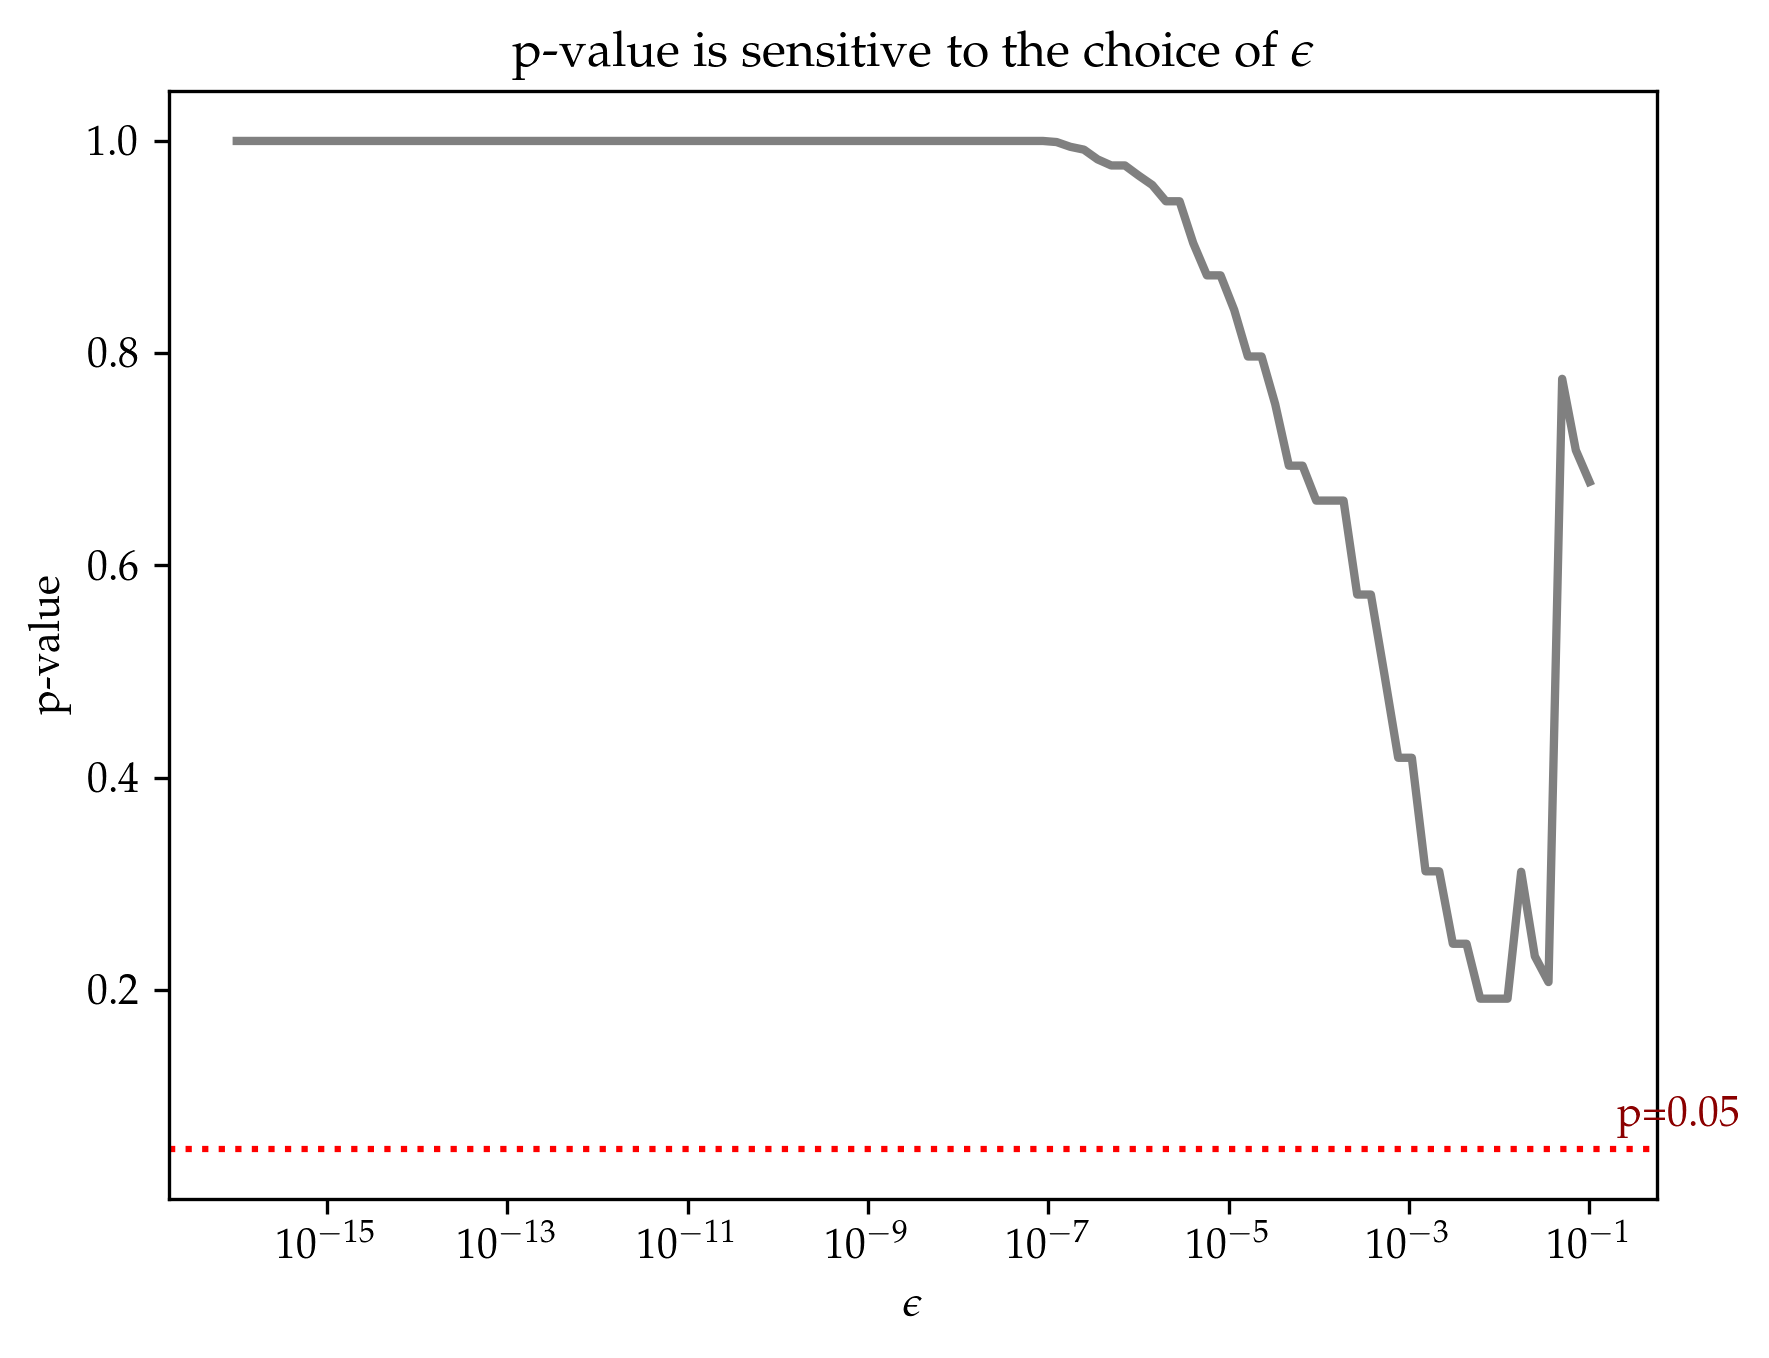

In [70]:
xϵ = logspace(-16,-1,100)
pval_ϵ = [get_pval(resid_μposterior, full(resid_Σposterior), ϵ) for ϵ in xϵ]
plt.semilogx(xϵ, pval_ϵ, "-", color="grey", linewidth=2)
plt.axhline(0.05, linestyle=":", color="red")
plt.text(x=0.2, y=0.06, s="p=0.05", color="darkred", verticalalignment="bottom")
plt.title(L"p-value is sensitive to the choice of $\epsilon$")
plt.xlabel(L"\epsilon")
plt.ylabel("p-value")
;

## modified $\chi^2$ test

In [71]:
function chisquare(gpT::GPE, gpC::GPE, X∂::Matrix, ϵ; verbose=false)
    extrap◫_T = GaussianProcesses.predict_f(gpT, X◫; full_cov=true)
    extrap◫_C = GaussianProcesses.predict_f(gpC, X◫; full_cov=true)
    μpost = extrap◫_T[1].-extrap◫_C[1]
    
    K∂C = cov(gpC.k, X∂, gpC.X)
    KC∂ = K∂C'
    KCC = gpC.cK
    
    KCT = cov(gpC.k, gpC.X, gpT.X)
    KTT = gpT.cK
    KT∂ = cov(gpT.k, gpT.X, X∂)
    K∂T = KT∂'
    
    K∂CT∂ = K∂C * (KCC \ KCT) * (KTT \ KT∂)
    
    Σ∂T12 = PDMats.whiten(KTT, KT∂)
#     Σ∂T = K∂T * (KTT \ KT∂)
    Σ∂T = Σ∂T12' * Σ∂T12
    
    Σ∂C12 = PDMats.whiten(KCC, KC∂)
    Σ∂C = Σ∂C12' * Σ∂C12
    
    chi2cov = Σ∂T + Σ∂C - (K∂CT∂ + K∂CT∂')
    if verbose
        evals = eigvals(Symmetric(chi2cov))
        print(evals)
        plt.semilogy(eigvals(Symmetric(chi2cov)))
        plt.xlabel("Eigenvalue number")
        plt.ylabel("Eigenvalue")
        thresh = minimum(evals[evals ./ sum(evals) .> ϵ])
        plt.axhline(thresh, color="red")
    end
    return get_pval(μpost, chi2cov, ϵ)
end

chisquare (generic function with 1 method)

[-

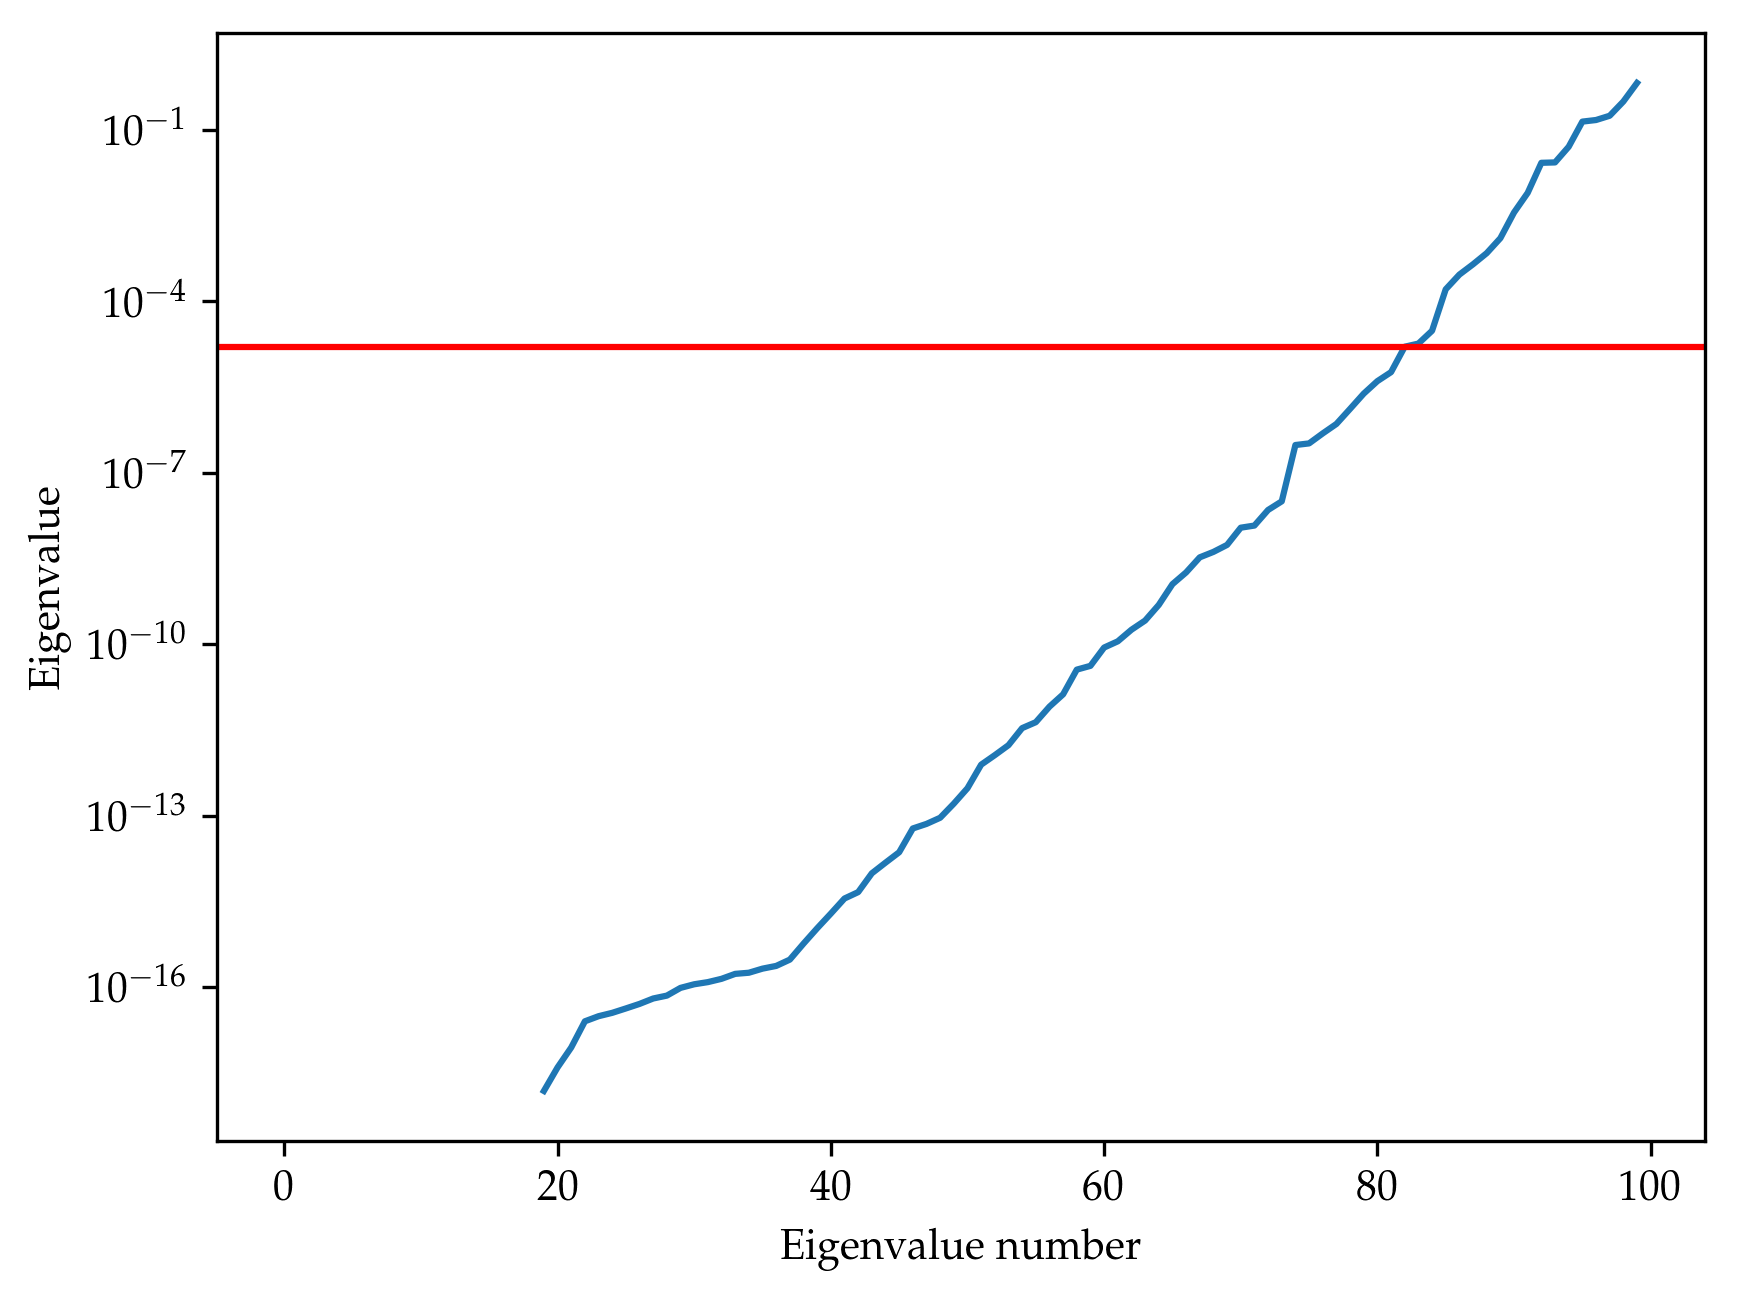

3.08859e-16, -2.7695e-16, -2.1069e-16, -1.74623e-16, -1.60642e-16, -1.46305e-16, -1.07631e-16, -9.41983e-17, -8.4285e-17, -7.61035e-17, -5.68724e-17, -5.20992e-17, -4.44772e-17, -3.09858e-17, -2.82474e-17, -1.04336e-17, -6.03719e-18, -3.96127e-18, -8.7799e-19, 1.51688e-18, 3.91464e-18, 8.74583e-18, 2.5121e-17, 3.08555e-17, 3.53345e-17, 4.21833e-17, 5.06386e-17, 6.29935e-17, 7.07646e-17, 9.66263e-17, 1.11726e-16, 1.21888e-16, 1.3919e-16, 1.69947e-16, 1.77922e-16, 2.09838e-16, 2.34067e-16, 3.01957e-16, 5.74708e-16, 1.06776e-15, 1.92885e-15, 3.54405e-15, 4.58356e-15, 9.77936e-15, 1.5017e-14, 2.28414e-14, 5.96204e-14, 7.1623e-14, 9.17571e-14, 1.6217e-13, 3.01904e-13, 7.79747e-13, 1.14454e-12, 1.70949e-12, 3.40227e-12, 4.31916e-12, 8.07645e-12, 1.32921e-11, 3.59437e-11, 4.18588e-11, 8.75293e-11, 1.12371e-10, 1.79376e-10, 2.59778e-10, 4.8795e-10, 1.12572e-9, 1.80711e-9, 3.31855e-9, 4.13368e-9, 5.48077e-9, 1.09643e-8, 1.19455e-8, 2.23925e-8, 3.17215e-8, 3.06821e-7, 3.27548e-7, 4.90021e-7, 7.1

5.622654102433339e-13

In [72]:
chisquare(resid_GP_dict[distrA], 
          resid_GP_dict[distrB],
          hcat(sentinels[distrA,distrB].coordinates...),
          1e-5,
          verbose=true,
          )

In [73]:
GeoRDD.chisquare(resid_GP_dict[distrA], 
          resid_GP_dict[distrB],
          hcat(sentinels[distrA,distrB].coordinates...),
          1e-5,
          verbose=true,
          )

[-3.08859e-16, -2.7695e-16, -2.1069e-16, -1.74623e-16, -1.60642e-16, -1.46305e-16, -1.07631e-16, -9.41983e-17, -8.4285e-17, -7.61035e-17, -5.68724e-17, -5.20992e-17, -4.44772e-17, -3.09858e-17, -2.82474e-17, -1.04336e-17, -6.03719e-18, -3.96127e-18, -8.7799e-19, 1.51688e-18, 3.91464e-18, 8.74583e-18, 2.5121e-17, 3.08555e-17, 3.53345e-17, 4.21833e-17, 5.06386e-17, 6.29935e-17, 7.07646e-17, 9.66263e-17, 1.11726e-16, 1.21888e-16, 1.3919e-16, 1.69947e-16, 1.77922e-16, 2.09838e-16, 2.34067e-16, 3.01957e-16, 5.74708e-16, 1.06776e-15, 1.92885e-15, 3.54405e-15, 4.58356e-15, 9.77936e-15, 1.5017e-14, 2.28414e-14, 5.96204e-14, 7.1623e-14, 9.17571e-14, 1.6217e-13, 3.01904e-13, 7.79747e-13, 1.14454e-12, 1.70949e-12, 3.40227e-12, 4.31916e-12, 8.07645e-12, 1.32921e-11, 3.59437e-11, 4.18588e-11, 8.75293e-11, 1.12371e-10, 1.79376e-10, 2.59778e-10, 4.8795e-10, 1.12572e-9, 1.80711e-9, 3.31855e-9, 4.13368e-9, 5.48077e-9, 1.09643e-8, 1.19455e-8, 2.23925e-8, 3.17215e-8, 3.06821e-7, 3.27548e-7, 4.90021e-7, 7

LoadError: [91mUndefVarError: plt not defined[39m

### p-value as a function of $\epsilon$ (yikes)

In [74]:
xϵ = logspace(-16,-1,100)
pval_ϵ = [chisquare(resid_GP_dict[distrA], 
          resid_GP_dict[distrB],
          hcat(sentinels[distrA,distrB].coordinates...),
          ϵ,
          verbose=false,
          ) for ϵ in xϵ]
;

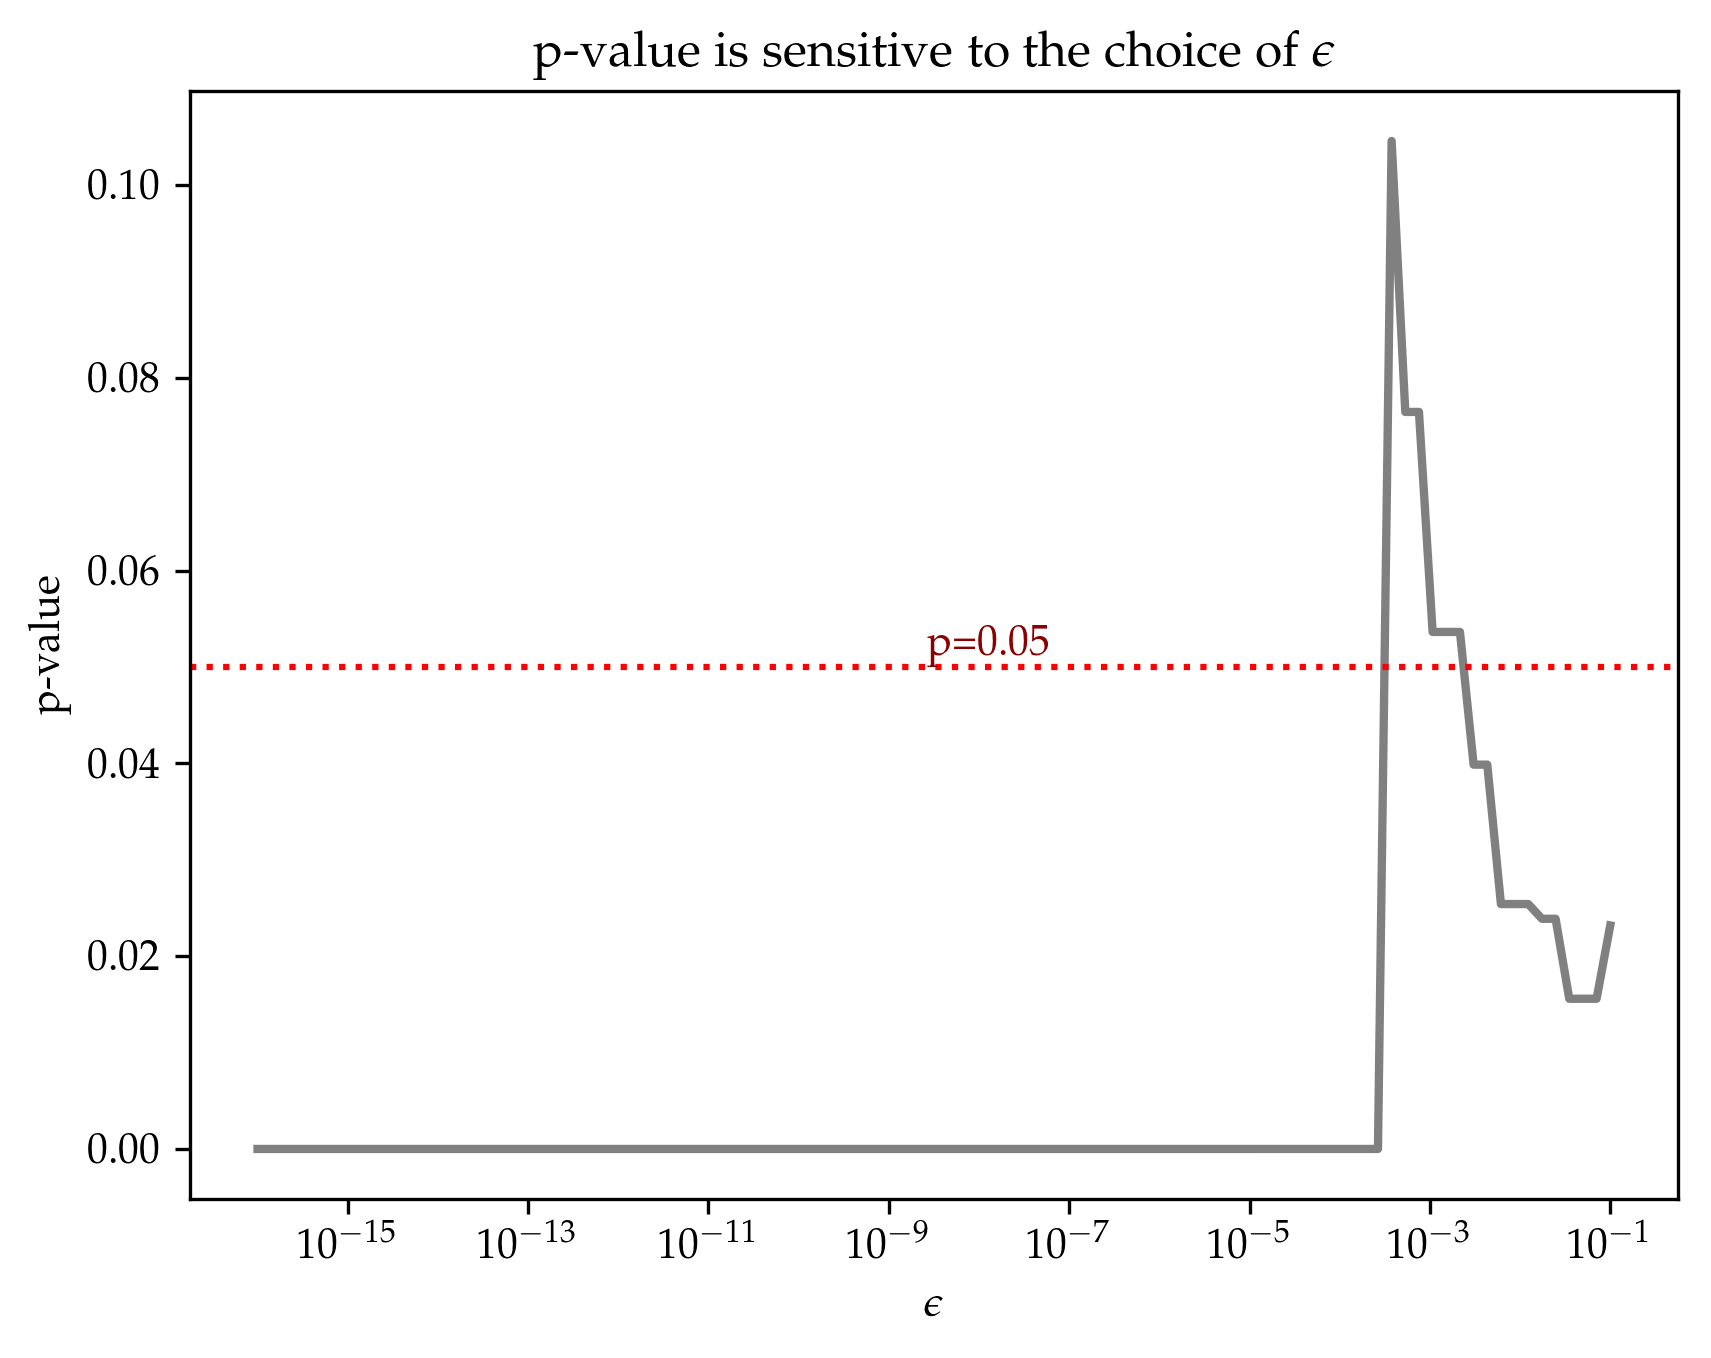

In [75]:
plt.semilogx(xϵ, pval_ϵ, "-", color="grey", linewidth=2)
plt.axhline(0.05, linestyle=":", color="red")
plt.text(x=xϵ[50], y=0.05, s="p=0.05", color="darkred", verticalalignment="bottom")
plt.title(L"p-value is sensitive to the choice of $\epsilon$")
plt.xlabel(L"\epsilon")
plt.ylabel("p-value")
;

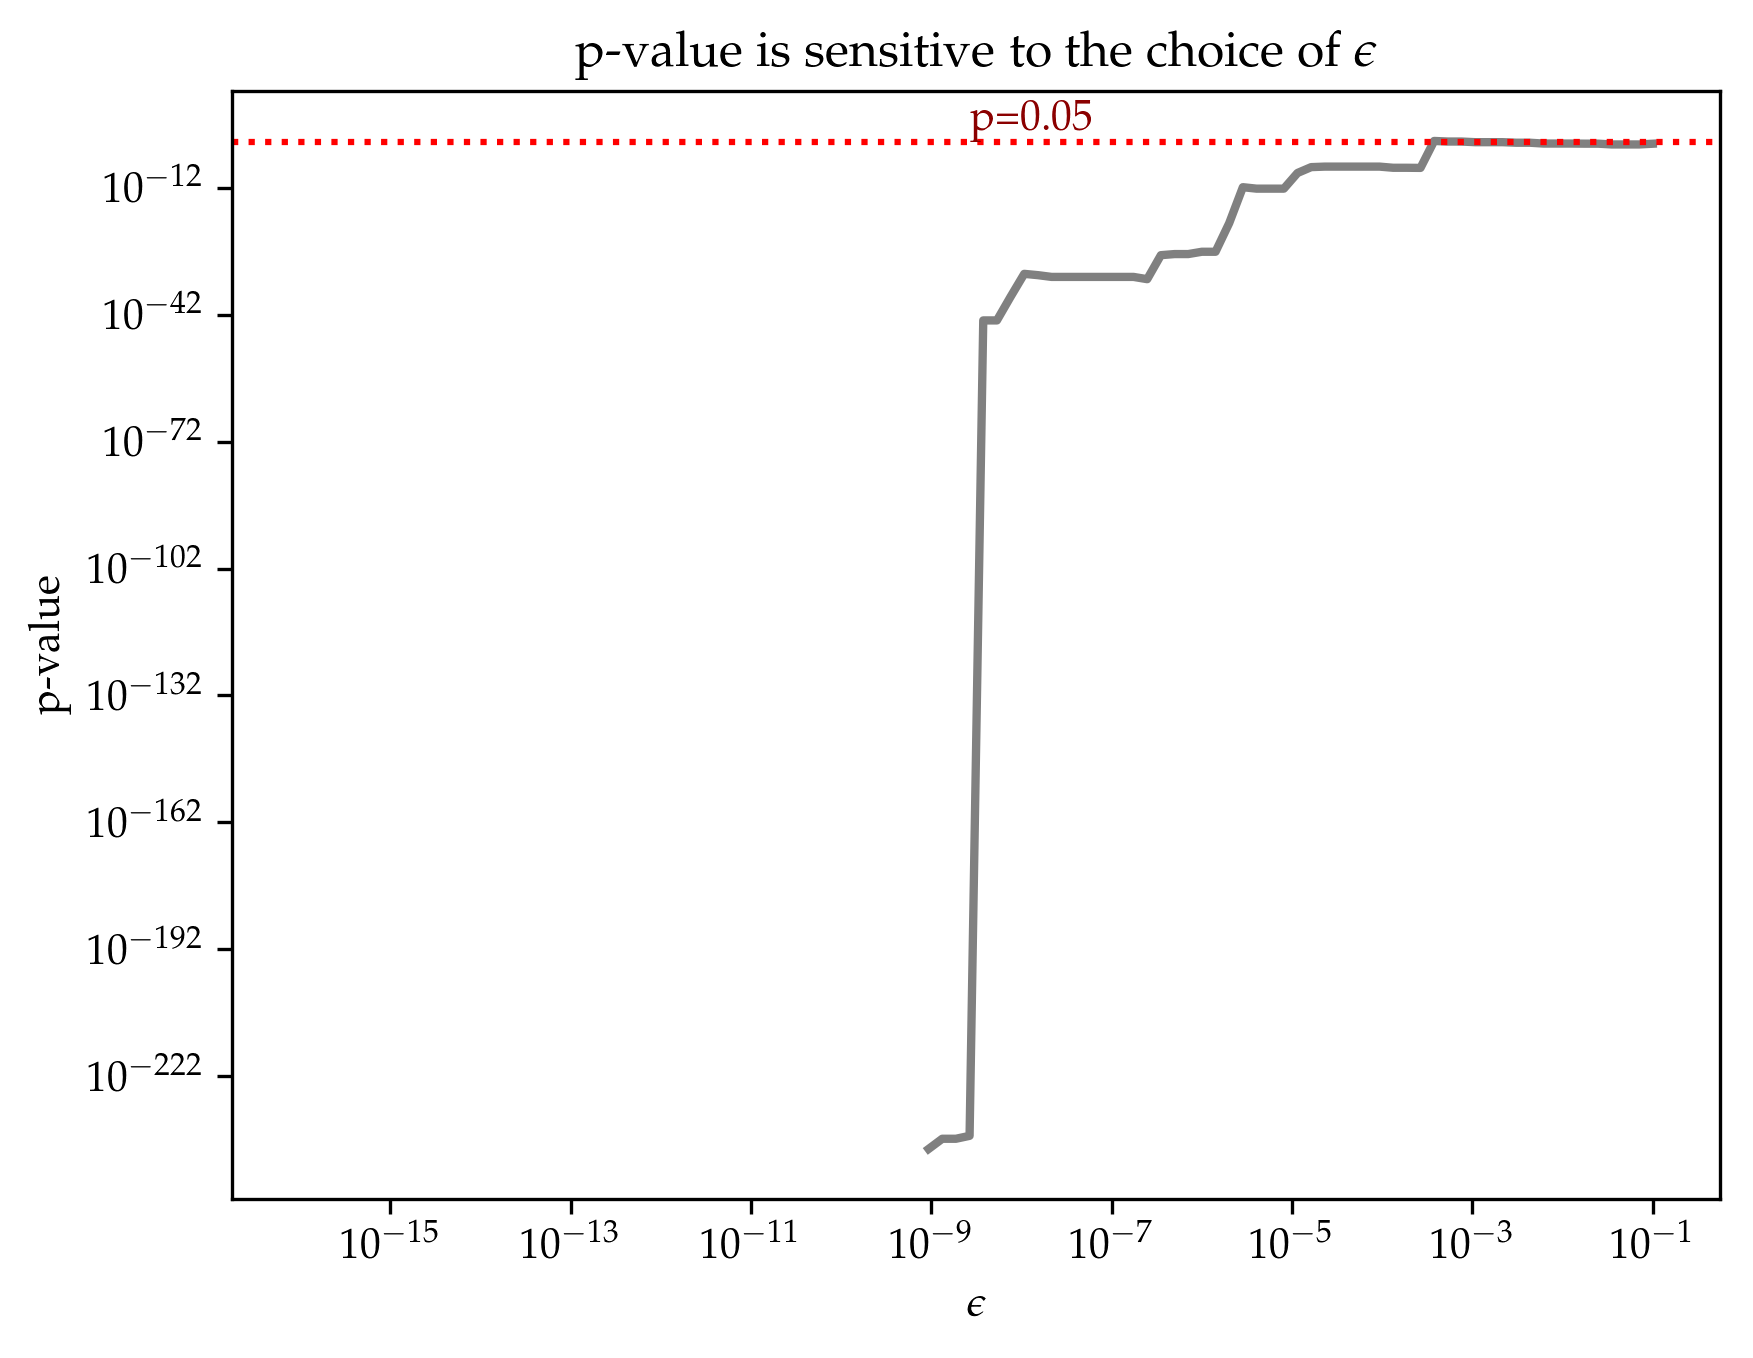

In [76]:
plt.loglog(xϵ, pval_ϵ, "-", color="grey", linewidth=2)
plt.axhline(0.05, linestyle=":", color="red")
plt.text(x=xϵ[50], y=0.05, s="p=0.05", color="darkred", verticalalignment="bottom")
plt.title(L"p-value is sensitive to the choice of $\epsilon$")
plt.xlabel(L"\epsilon")
plt.ylabel("p-value")
;

In [77]:
function ϵPINV(Σ::Matrix{Float64})
    tol = eps() * maximum(Σ) * maximum(size(Σ))
    sumλ = trace(Σ)
    ϵ = tol / sumλ
    return ϵ
end

ϵPINV (generic function with 1 method)

Good news: below 0.05. Bad news: depends heavily on the choice of $\epsilon$.

## p-value from $\chi^2$ statistic under simulated null parametric bootstrap

In [78]:
distrA = "19"
distrB = "27"
t=GeoRDD.chistat(resid_GP_dict[distrA], 
             resid_GP_dict[distrB], 
             hcat(sentinels[distrA,distrB].coordinates...))

14.069335692661525

In [79]:
@time t_nulls = GeoRDD.nsim_chi(resid_GP_dict[distrA], 
                             resid_GP_dict[distrB], 
                             hcat(sentinels[distrA,distrB].coordinates...),
                             1000;
                             update_mean=true
                             );

 82.901893 seconds (361.40 k allocations: 7.623 GiB, 2.50% gc time)


In [80]:
median(t_nulls)

9.563652375324239

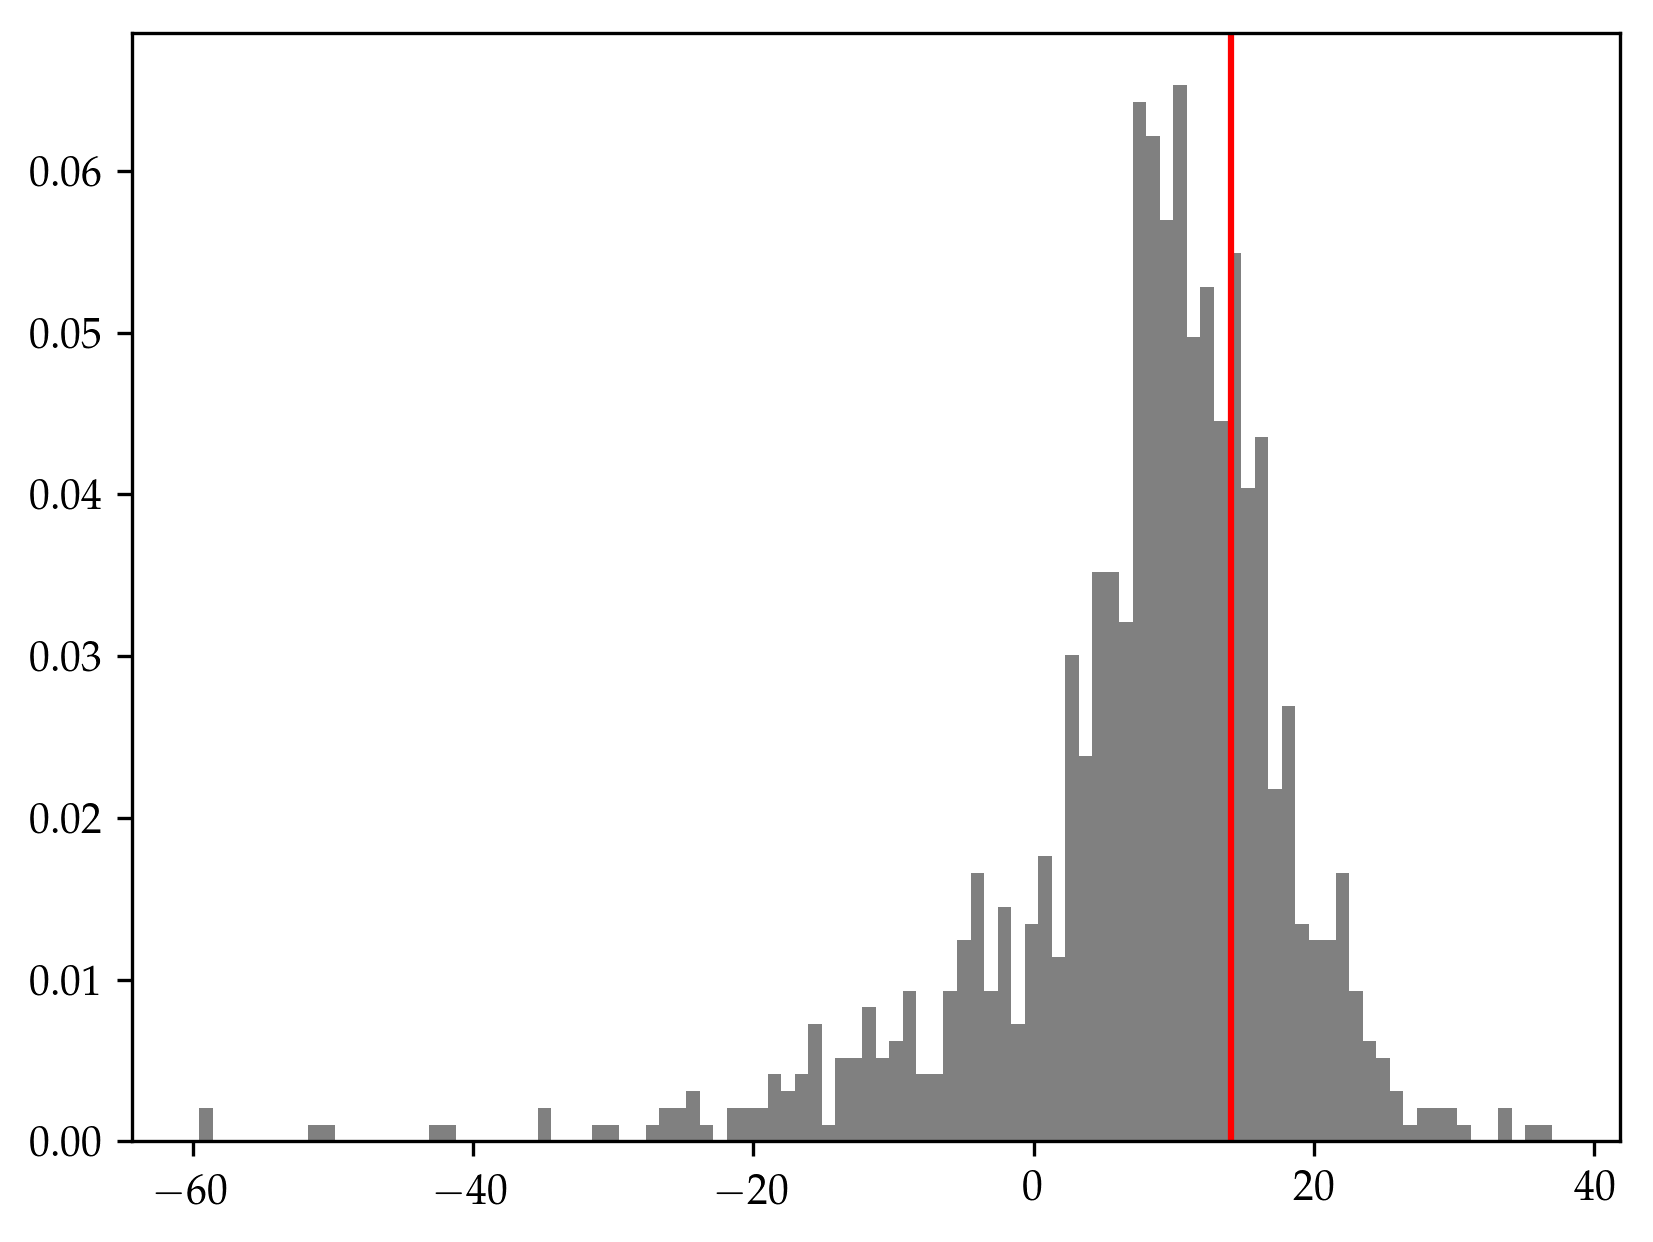

In [81]:
plt.plt[:hist](t_nulls, normed=true, bins=100, color="grey", edgecolor="none")
plt.axvline(t, color="red")
xx=linspace(0,160,200)
# plt.plot(xx, pdf(d,xx), color="turquoise")
;

In [82]:
chi2_boot_pval = mean(t_nulls .> t)

0.258

So we get a p-value of $\approx0.25$, and no significant effect at all.
Shit.

### Sanity check: add constant to one side, do we get a significant treatment effect?

In [83]:
distrB

"27"

In [84]:
begin
    name=distrB
    X = X_dict[name]
    Y = resid_dict[name].+0.2
    global distrBplus = GP(X', Y, MeanConst(mean(Y)), gp27.k, gp27.logNoise)
end
;

In [85]:
tplus=GeoRDD.chistat(resid_GP_dict[distrA], 
             distrBplus, 
             hcat(sentinels[distrA,distrB].coordinates...))

44.72199312363409

In [86]:
mean(t_nulls .> tplus)

0.0

It doesn't take much of a treatment effect to bring the p-value down to zero (to the nearest thousandth). 
We've added 0.2 to district 27 log residual house prices, which is comparable to the inverse-variance estimated mean treatment effect of 0.191.
So the test seems to be working properly.

### Placebo test for $\chi^2$ parametric bootstrap test

In [87]:
# gpA=resid_GP_dict[distrA]
# @time placebo_chi_pvals_A = [GeoRDD.placebo_chi(angle, 
#     gpA.X, 
#     gpA.y, 
#     gpA.k, 
#     gpA.logNoise, 
#     1000;
#     update_mean=true
#     ) 
#     for angle in 1.:2.:180.];

In [88]:
# gpB=resid_GP_dict[distrB]
# @time placebo_chi_pvals_B = [GeoRDD.placebo_chi(angle, 
#     gpB.X, 
#     gpB.y, 
#     gpB.k, 
#     gpB.logNoise, 
#     1000;
#     update_mean=true
#     ) 
#     for angle in 1.:2.:180.];

In [89]:
# plt.plot(1:2:180, placebo_chi_pvals_A, label=@sprintf("district %s", distrA), linewidth=2)
# # plt.plot(1:2:180, placebo_chi_pvals_B, label=@sprintf("district %s", distrB), linewidth=2)
# plt.xlabel("Angle (degrees)")
# plt.ylabel("p-value")
# plt.title(L"p-value of $\chi^2$ test at each angle")
# plt.legend()
# ;

In [90]:
# mean(placebo_chi_pvals_A.<0.05),mean(placebo_chi_pvals_B.<0.05)

In [91]:
# mean(placebo_chi_pvals_A.<chi2_boot_pval),mean(placebo_chi_pvals_B.<chi2_boot_pval)

In [92]:
# plt.plt[:hist](placebo_chi_pvals_A, bins=20, linewidth=2, label=@sprintf("district %s", distrA), histtype="step")
# plt.plt[:hist](placebo_chi_pvals_B, bins=20, linewidth=2, label=@sprintf("district %s", distrB), histtype="step")
# plt.axvline(chi2_boot_pval, color="red", label="observed", linewidth=3)
# plt.legend(loc="upper right")
# plt.xlabel("p-value")
# plt.ylabel("Count")
# plt.title("p-values of placebos")
# ;

The placebo test for the $\chi^2$ bootstrap test doesn't show any particularly strong bias. 
We actually see a slant towards high p-values in district 19, and a slant towards low p-values in district 27. 
Considering the low number of effective samples, this seems pretty reasonable to me.
Unfortunately, this means we can't invalidate the $\chi^2$ test's failure to reject the sharp null.

## simulated nulls looking at mll instead of $\chi^2$

In [93]:
@time mll_sims = GeoRDD.nsim_logP(resid_GP_dict[distrA], 
                             resid_GP_dict[distrB], 
                             1000;
                             update_mean=true
                             );

 39.446524 seconds (152.42 k allocations: 551.411 MiB, 2.34% gc time)


In [94]:
mll_sim_null = [sim[1] for sim in mll_sims]
mll_sim_altv = [sim[2] for sim in mll_sims]
;

In [95]:
mll_null, mll_altv = GeoRDD.data_logP(resid_GP_dict[distrA], resid_GP_dict[distrB])

(-1755.8357867041182, -1752.9793504656434)

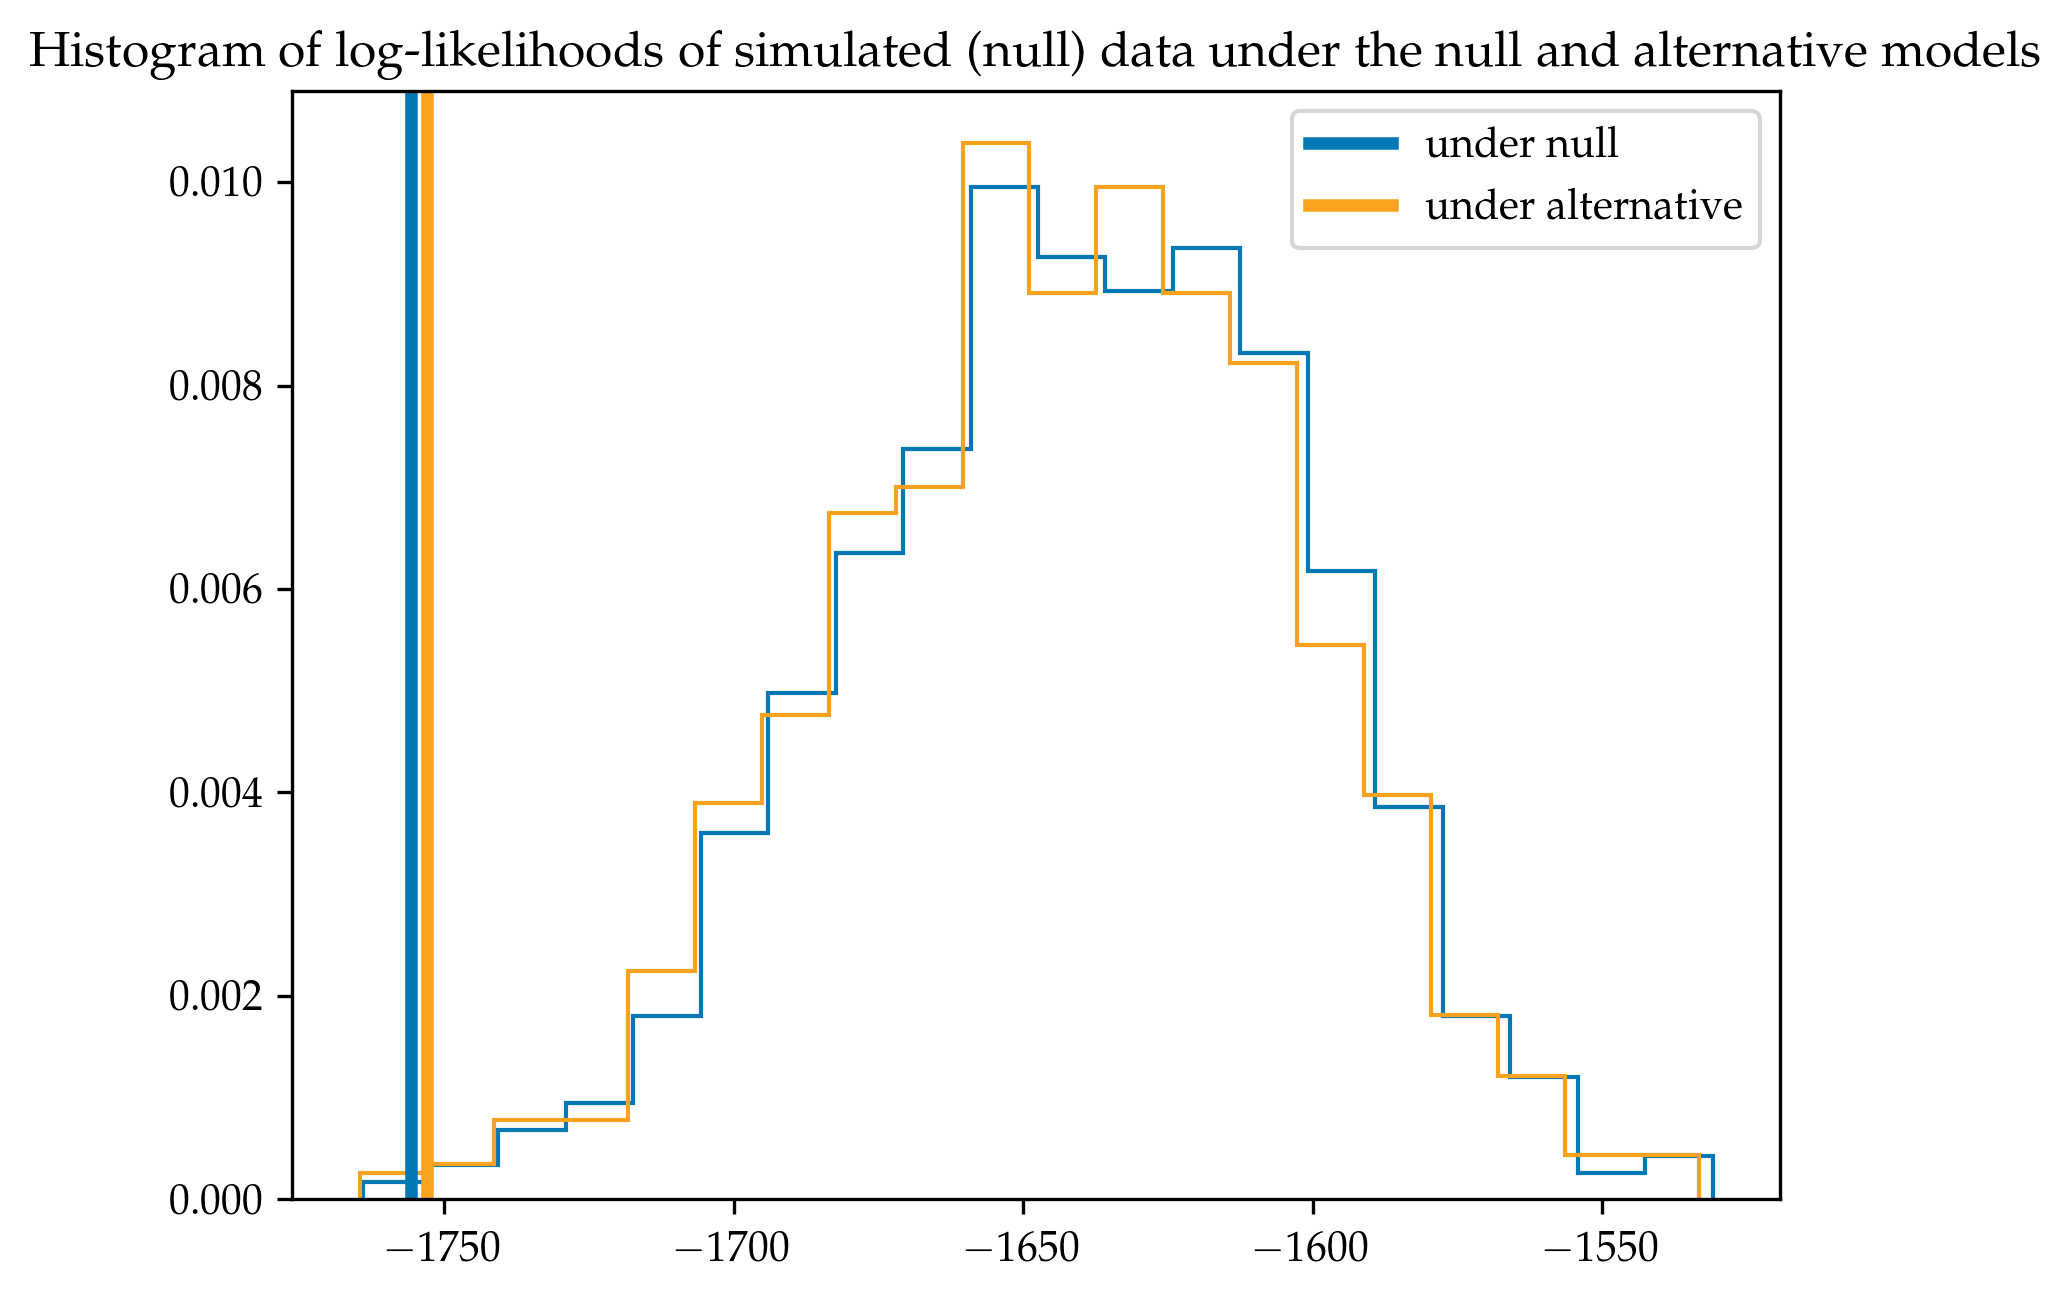

In [96]:
plt.plt[:hist](mll_sim_null, normed=true, bins=20, color="#0078B5", histtype="step", linewidth=1)
plt.plt[:hist](mll_sim_altv, normed=true, bins=20, color="#F8A21F", histtype="step", linewidth=1)
plt.axvline(mll_null, color="#0078B5", label="under null", linewidth=3)
plt.axvline(mll_altv, color="#F8A21F", label="under alternative", linewidth=3)
plt.legend()
plt.title("Histogram of log-likelihoods of simulated (null) data under the null and alternative models")
;

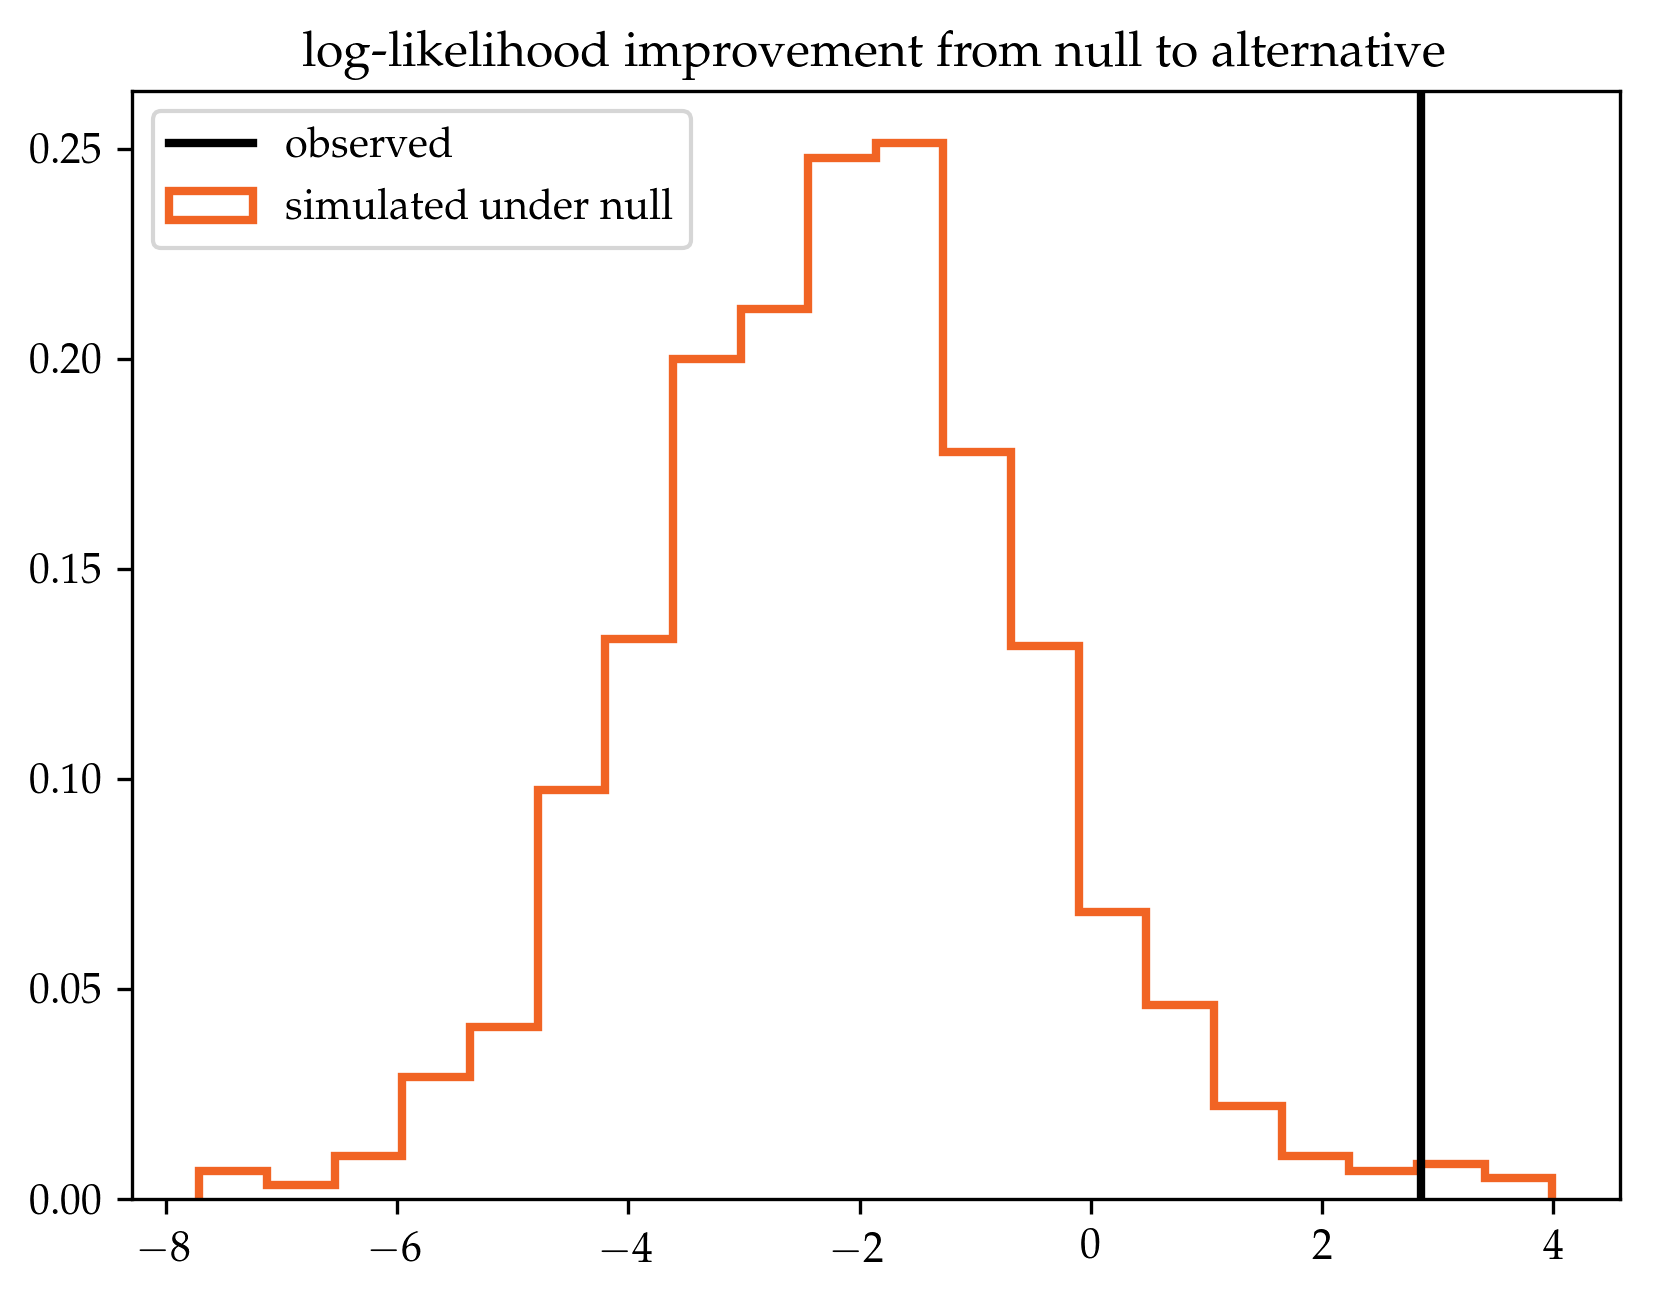

In [97]:
plt.plt[:hist](mll_sim_altv.-mll_sim_null, normed=true, bins=20, color="#F16424", histtype="step", linewidth=2, label="simulated under null")
plt.axvline(mll_altv-mll_null, color="black", label="observed", linewidth=2)
plt.legend(loc="best")
plt.title("log-likelihood improvement from null to alternative")
;

In [98]:
p_val_mll = mean((mll_sim_altv.-mll_sim_null) .> (mll_altv-mll_null))
@printf("p-value of mll parametric bootstrap test: %.3f", p_val_mll)

p-value of mll parametric bootstrap test: 0.008

### placebo test for mll test

In [99]:
# gpA=resid_GP_dict[distrA]
# @time placebo_pvals_A = [GeoRDD.placebo_mll(angle, 
#     gpA.X, 
#     gpA.y, 
#     gpA.k, 
#     gpA.logNoise, 
#     1000;
#     update_mean=true
#     ) 
#     for angle in 1.:2.:180.];

In [100]:
# gpB=resid_GP_dict[distrB]
# @time placebo_pvals_B = [GeoRDD.placebo_mll(angle, 
#     gpB.X, 
#     gpB.y, 
#     gpB.k, 
#     gpB.logNoise, 
#     1000;
#     update_mean=true
#     ) 
#     for angle in 1.:2.:180.];

In [101]:
# plt.plot(1:2:180, placebo_pvals_A, label=@sprintf("district %s", distrA), linewidth=2)
# plt.plot(1:2:180, placebo_pvals_B, label=@sprintf("district %s", distrB), linewidth=2)
# plt.xlabel("Angle (degrees)")
# plt.ylabel("p-value")
# plt.title("p-value at each angle for data simulated under the null")
# plt.legend()
# ;

In [102]:
# mean(placebo_pvals_A.<0.05),mean(placebo_pvals_B.<0.05)

In [103]:
# mean(placebo_pvals_A.<p_val_mll),mean(placebo_pvals_B.<p_val_mll)

In [104]:
# plt.plt[:hist](placebo_pvals_A, bins=20, linewidth=2, label=@sprintf("district %s", distrA), histtype="step")
# plt.plt[:hist](placebo_pvals_B, bins=20, linewidth=2, label=@sprintf("district %s", distrB), histtype="step")
# plt.axvline(p_val_mll, color="red", label="observed", linewidth=3)
# plt.legend(loc="upper right")
# plt.xlabel("p-value")
# plt.ylabel("Count")
# plt.title("p-values of placebos")
# ;

In [105]:
# function plot_line(angle::Float64, shift::Float64, X::Matrix; kwargs...)
#     meanx=mean(X[1,:])
#     meany=mean(X[2,:])
#     dydx=tand(angle)
#     direction=sign(cosd(angle+90))
#     if direction==0.0
#         direction=1.0
#     end
#     shift_x = shift*cosd(angle+90)*direction
#     shift_y = shift*sind(angle+90)*direction
    
#     xlim=plt.xlim()
#     ylim=plt.ylim()
#     xlim_arr = Float64[xlim[1],xlim[2]]
#     ylim_arr = Float64[ylim[1],ylim[2]]
#     if dydx > 1e3
#         plt.axvline(meanx+shift_x, color="red"; kwargs...)
#     elseif dydx > 10
#         plt.plot(meanx+(ylim_arr.-meany.-shift_y)./dydx+shift_x,ylim_arr; color="red", kwargs...)
#     else
#         plt.plot(xlim_arr,meany+(xlim_arr.-shift_x.-meanx).*dydx+shift_y; color="red", kwargs...)
#     end
#     plt.xlim(xlim)
#     plt.ylim(ylim)
# end
# plt.scatter(gpB.X[1,:],gpB.X[2,:], color="white", edgecolor="blue", marker="p")
# plot_line(50.0, GeoRDD.shift_for_even_split(50.0, gpB.X), gpB.X)
# ;

## Plot surface

In [106]:
# mean(Y_dict[distrA])-mean(Y_dict[distrB])

In [107]:
distrA

"19"

In [108]:
gridA = readcsv(
    @sprintf("NYC_data/processed/SchoolDistrict_grids/SchoolDistrict_grid_%s.csv", distrA), 
    header=false)
gridB = readcsv(
    @sprintf("NYC_data/processed/SchoolDistrict_grids/SchoolDistrict_grid_%s.csv", distrB), 
    header=false)

predgridA=GaussianProcesses.predict_f(resid_GP_dict[distrA], gridA'; full_cov=false)
predgridB=GaussianProcesses.predict_f(resid_GP_dict[distrB], gridB'; full_cov=false)

Xsent=hcat(sentinels[distrA,distrB].coordinates...)
predA_sent = GaussianProcesses.predict_f(resid_GP_dict[distrA], Xsent; full_cov=false)
predB_sent = GaussianProcesses.predict_f(resid_GP_dict[distrB], Xsent; full_cov=false)
;

In [109]:
function plot_surface3d(gridT, gridC, gpT, gpC, X∂)
    predgridT=GaussianProcesses.predict_f(gpT, gridT'; full_cov=false)
    predgridC=GaussianProcesses.predict_f(gpC, gridC'; full_cov=false)
    predT_∂ = GaussianProcesses.predict_f(gpT, X∂; full_cov=false)
    predC_∂ = GaussianProcesses.predict_f(gpC, X∂; full_cov=false)
    
    trisurf_X = [gridT[:,1];gridC[:,1]]
    trisurf_Y = [gridT[:,2];gridC[:,2]]
    trisurf_Z = [predgridT[1];predgridC[1]]
    cutoff_Y = 1.7e5
    trisurf_doplot = trisurf_Y .> cutoff_Y
    plt.plot_trisurf(
        trisurf_X[trisurf_doplot], 
        trisurf_Y[trisurf_doplot], 
        trisurf_Z[trisurf_doplot], 
        linewidth=0, 
        cmap=plt.cm_get_cmap("jet"),
        vmin=minimum(predgridT[1]),
        vmin=5.3,
        vmax=5.8,
        )
    plt.plot3D(X∂[1,:], X∂[2,:], predT_∂[1], color=cbbPalette[6], linewidth=3,
        label=L"predicted $g(\partial)$ in district 19")
    plt.plot3D(X∂[1,:], X∂[2,:], predC_∂[1], color=cbbPalette[5], linewidth=3,
        label=L"predicted $g(\partial)$ in district 27")

    plt.text3D(X∂[1,50]+2000,X∂[2,50],5.6,"district 27",horizontalalignment="left")
    plt.text3D(X∂[1,50]-2000,X∂[2,50],5.3,"district 19",
        color="white",fontweight=200,horizontalalignment="right")
    ax=plt.gca()
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.zlabel("log price per sqft")
    plt.legend(loc="best", fontsize="small")
    ax[:view_init](elev=60, azim=230)
    ax[:set_xticklabels]([])
    ax[:set_yticklabels]([])
    plt.xlim(1.01e6, 1.05e6)
    plt.ylim(1.7e5, 1.93e5)
end

plot_surface3d (generic function with 1 method)

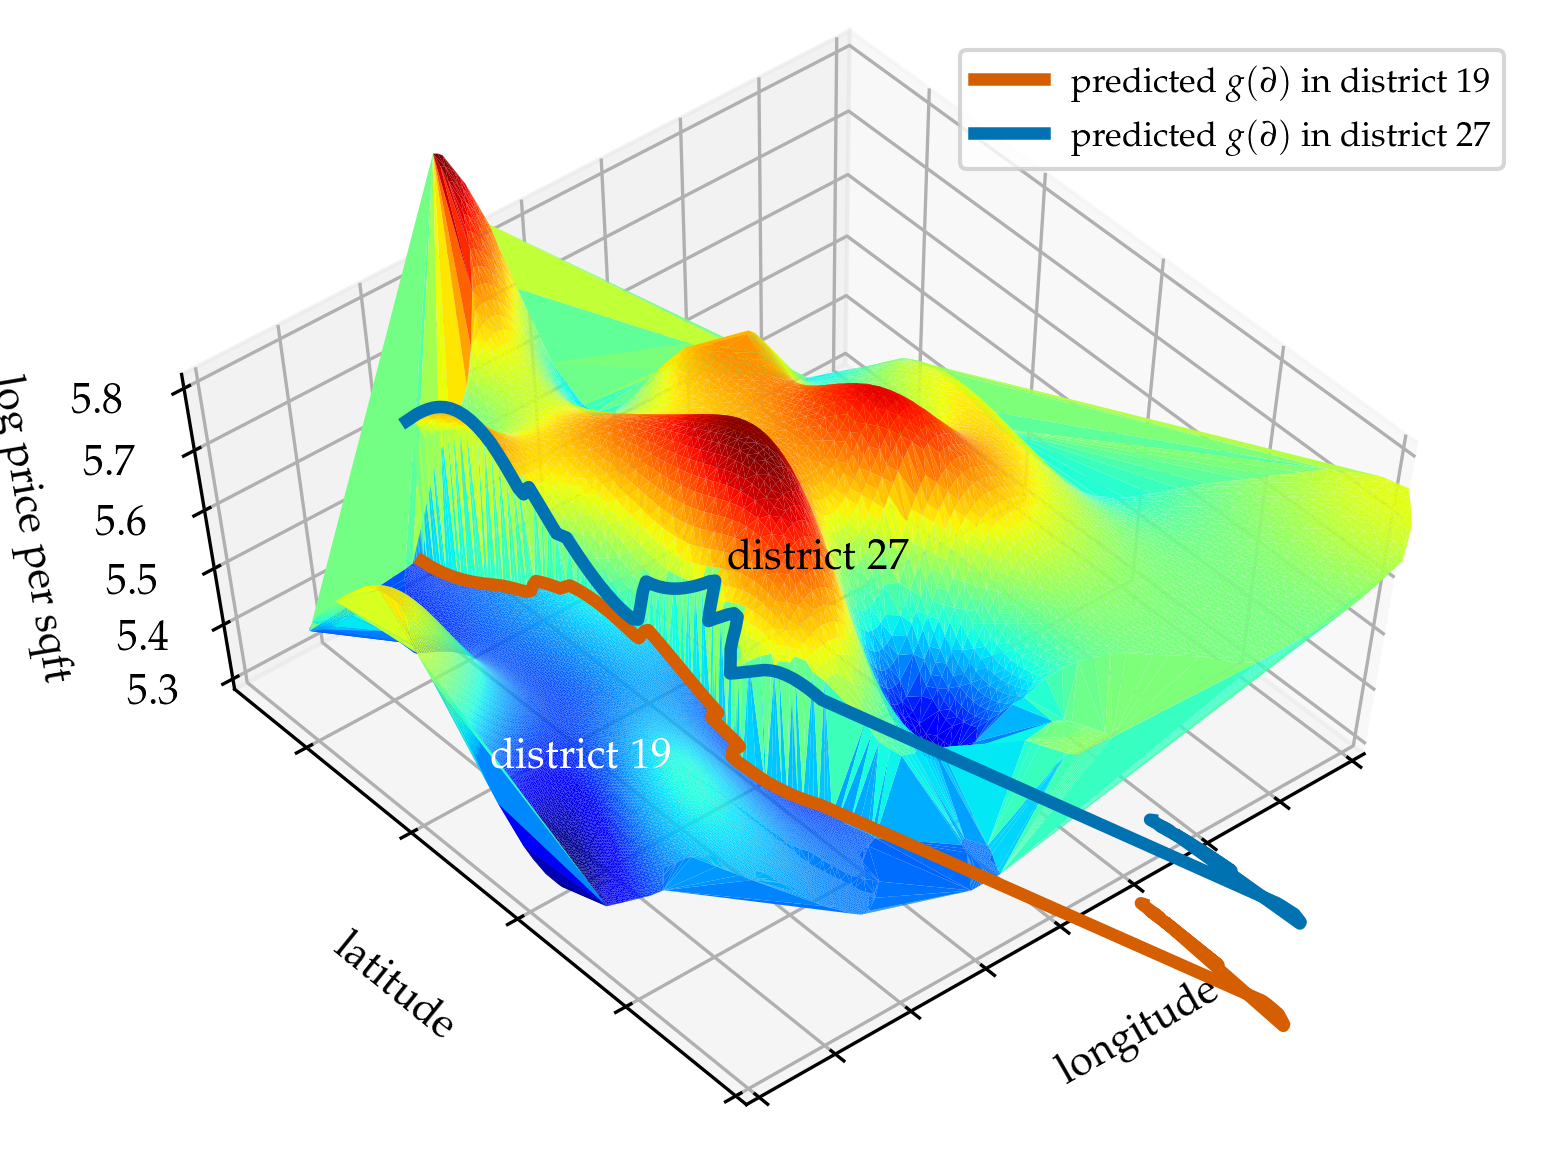

In [110]:
plot_surface3d(gridA, gridB, resid_GP_dict[distrA], resid_GP_dict[distrB], Xsent)
plt.savefig("NYC_plots/NYC_surface_plot.png")

In [111]:
# trisurf_X = [gridA[:,1];gridB[:,1]]
# trisurf_Y = [gridA[:,2];gridB[:,2]]
# trisurf_Z = [predgridA[1];predgridB[1]]
# cutoff_Y = 1.7e5
# trisurf_doplot = trisurf_Y .> cutoff_Y
# plt.plot_trisurf(
#     trisurf_X[trisurf_doplot], 
#     trisurf_Y[trisurf_doplot], 
#     trisurf_Z[trisurf_doplot], 
#     linewidth=0, 
#     cmap=plt.cm_get_cmap("jet"),
#     vmin=minimum(predgridA[1]),
#     vmin=5.3,
#     vmax=5.8,
#     )
# plt.plot3D(Xsent[1,:], Xsent[2,:], predA_sent[1], color=cbbPalette[6], linewidth=3,
#     label=L"predicted $g(\partial)$ in district 19")
# plt.plot3D(Xsent[1,:], Xsent[2,:], predB_sent[1], color=cbbPalette[5], linewidth=3,
#     label=L"predicted $g(\partial)$ in district 27")
    
# plt.text3D(Xsent[1,50]+2000,Xsent[2,50],5.6,"district 27",horizontalalignment="left")
# plt.text3D(Xsent[1,50]-2000,Xsent[2,50],5.3,"district 19",
#     color="white",fontweight=200,horizontalalignment="right")
# ax=plt.gca()
# plt.xlabel("longitude")
# plt.ylabel("latitude")
# plt.zlabel("log price per sqft")
# plt.legend(loc="best", fontsize="small")
# ax[:view_init](elev=60, azim=230)
# ax[:set_xticklabels]([])
# ax[:set_yticklabels]([])
# plt.xlim(1.01e6, 1.05e6)
# plt.ylim(1.7e5, 1.93e5)
# plt.savefig("NYC_plots/NYC_surface_plot.png")

# Pairwise treatment effect

Beyond districts 19 and 27, I now look at every pair of contiguous NYC school districts, and compute the inverse-variance treatment effect. I then draw a map of all the district boundaries with the thickness of the boundaries drawn proportionally to the effect size $\E \tau/\sqrt{\V\tau}$. Boundaries with $\tau$ at least two standard deviations away from 0 are shown in black.

In [112]:
function get_τpost(gp_i::GPE, gp_j::GPE, sentinelX::Matrix)
    μ, Σ = GeoRDD.cliff_face(gp_i, gp_j, sentinelX)
    τpost = GeoRDD.inverse_variance(μ, Σ)
    return τpost
end 
;

In [113]:
τpost_pairs = Dict{Tuple{String,String},Normal}()
for (distrA,distrB) in keys(sentinels)
    X◫ = hcat(sentinels[distrA,distrB].coordinates...)
    τpost = get_τpost(resid_GP_dict[distrA], resid_GP_dict[distrB], X◫)
    τpost_pairs[distrA,distrB] = τpost
end

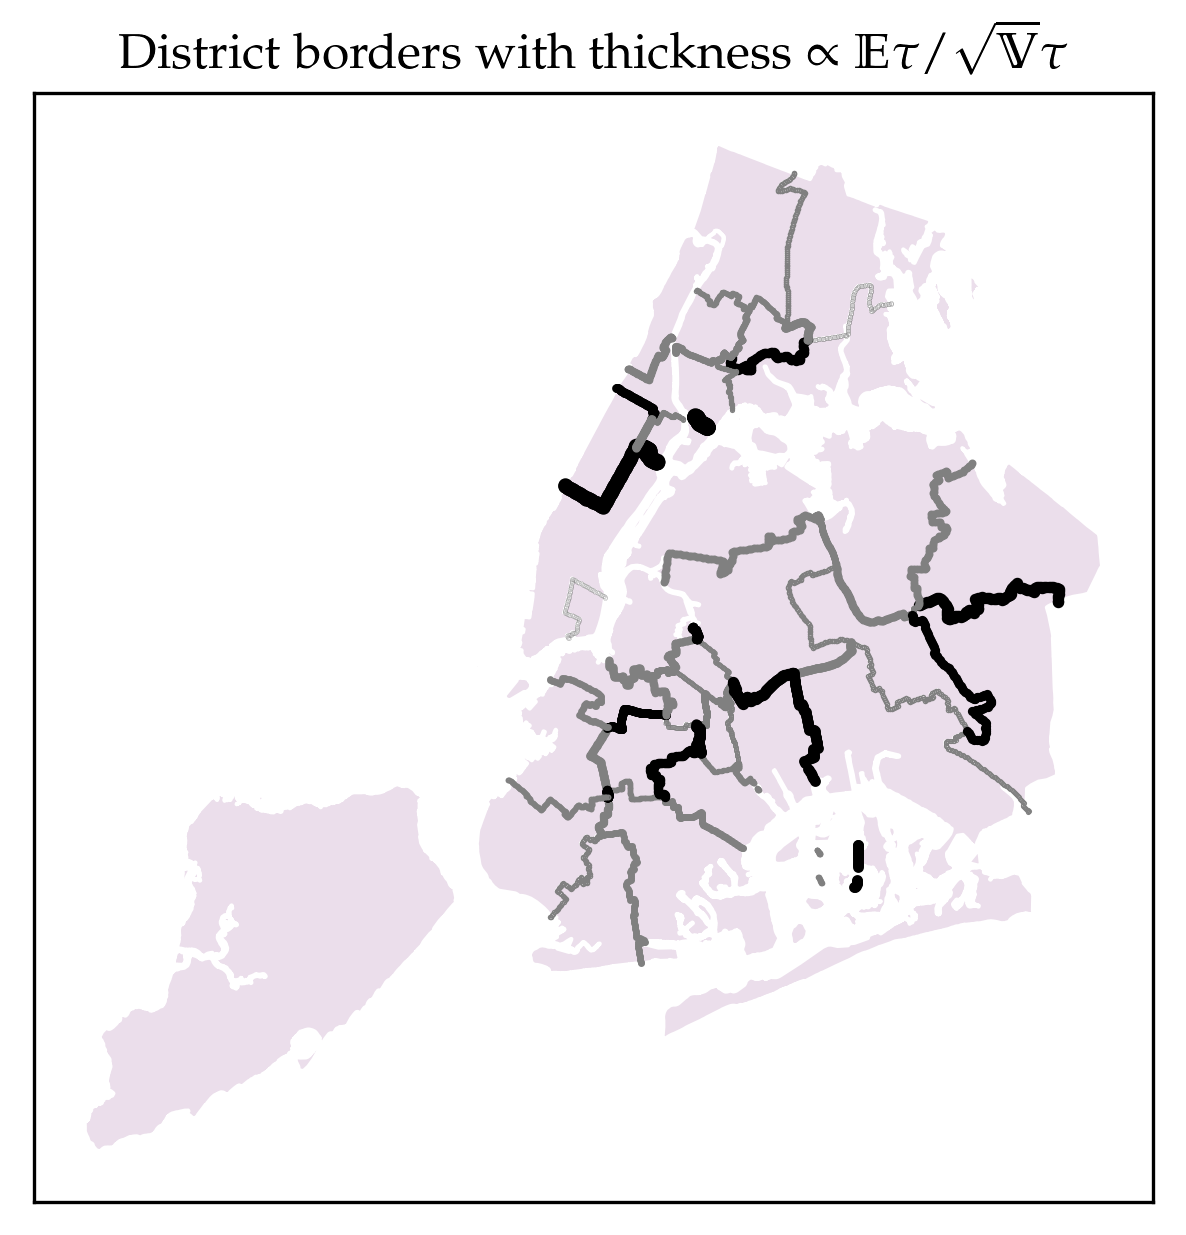

In [114]:
begin
    NYC_prepare_plots.background_schdistrs(
            plt.gca(), 
            color="#D8BFD8", 
            edgecolor="white", 
            linestyle="-")
    for distr_pair in keys(sentinels)
        distrA, distrB = distr_pair
        if distrA > distrB
            continue
        end
        X◫ = hcat(sentinels[distr_pair].coordinates...)

        τpost = τpost_pairs[distr_pair]
        eff_size = abs(mean(τpost)) / std(τpost)
        if eff_size > 2
            color="black"
        else
            color="gray"
        end
        plt.plot(X◫[1,:], X◫[2,:], marker=".", linestyle="", markersize=eff_size, color=color)
    end
    ax = plt.gca()
    ax[:set_aspect]("equal")
    ax[:get_xaxis]()[:set_ticks]([])
    ax[:get_yaxis]()[:set_ticks]([])
    plt.title(L"District borders with thickness $\propto \mathbb{E}\tau/{\sqrt\mathbb{V}\tau}$ ")
end
;